In [7]:
# Import standard libraries
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import solve_ivp
from scipy.ndimage import gaussian_filter
from scipy.optimize import fsolve, leastsq,root,brentq,newton,curve_fit
from sympy.utilities.lambdify import lambdify
from sympy import sympify
from sympy import var

import timeit
from time import time
from mpl_toolkits import mplot3d

# Set matplotlib parameters for consistent figure styling
plt.rcParams.update({
    "font.family": "STIXGeneral",
    "xtick.labelsize": 12,
    "xtick.direction": "in",
    "xtick.major.pad": 3,
    "xtick.top": True,
    "ytick.labelsize": 12,
    "ytick.direction": "in",
    "ytick.right": True,
    "axes.labelsize": 12,
    "axes.labelpad": 3,
    "axes.grid": True,
})

# Constants
E0 = 8.85e-12
e = 1.6e-19
m = 6.64215627e-26
pi = math.pi
h_bar = 1.0546e-34

# Parameters for the simulation
T_factor = (121 / 133.93969396934) * 1.1625  # The time factor for the simulation
voltage_change_factor = 1.00  # The factor to change the voltage
NUM_VOLTAGE_POINTS = 500  # The points for voltage sampling
T = 150 * 1e-6 * T_factor # Total time duration in s unit
points = 3000000  # Number of points at which to evaluate the solution
method = 'RK45'

Length of time_array: 10000, Length of scaled_voltage_array: 10000
scaled_voltage_array_min = 23.33, scaled_voltage_array_max = 28.68
First 5 elements of time_array: [0.00680938 0.02194134 0.03707331 0.05220527 0.06733723]
First 5 elements of scaled_voltage_array: [28.68 28.68 28.68 28.68 28.68]
The time range =  151.31129057234685  us


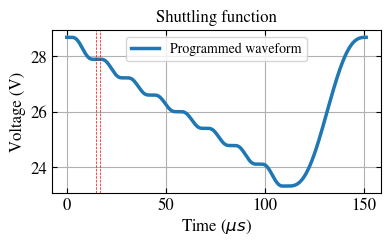

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.446658359524719
-0.7818919306684917
8.25954391700671
16.622066314187528
24.71044146602559
32.79881661786363
41.16133901504445
50.20277486271966
60.86754129157597
3000000
2.362891889445713
[0.7818316281245425, 0.004776587173235924, 2.605850573251495e-07, 2.2524386366628148e-05, 2.60584686442228e-07, 3.916408016748393e-06, 1.0423415894757046e-07, 7.349159928949234e-05, 1.5635077278302456e-07]
[113.95230098887484, 0.004253359040893778, 1.2658890560491084e-11, 9.458070894612401e-08, 1.265885452647577e-11, 2.8593840492728335e-09, 2.02542777572812e-12, 1.0068668101127587e-06, 4.5571853512519965e-12]

Current final results:  [113.95230098887484]
Lengt

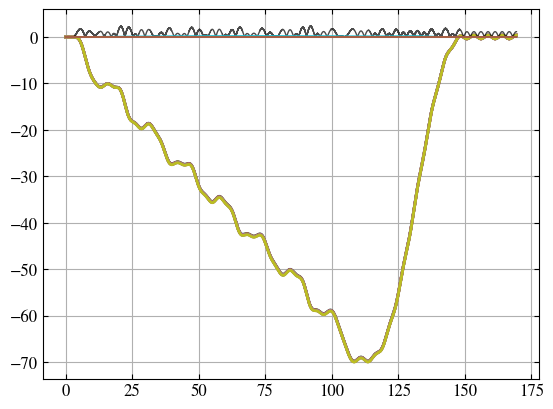

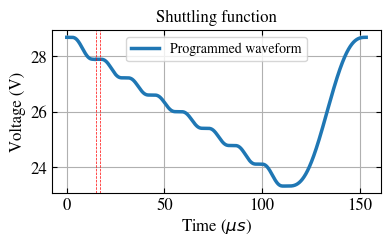

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.447081496110377
-0.7823142932840484
8.259122183035748
16.621645233596933
24.71002095981206
32.79839668602724
41.160919736588426
50.202356212908185
60.86712341573456
3000000
2.4133500281872733
[0.4609860437689656, 0.0037659526343354344, 1.536469746264239e-07, 2.248116523022759e-05, 1.5364698839906952e-07, 3.904556765554879e-06, 6.145891447633017e-08, 7.347301689605357e-05, 9.218802957306651e-08]
[39.61614232918734, 0.0026439079779235863, 4.400931966386735e-12, 9.421808298009405e-08, 4.400932755370435e-12, 2.8421049475235663e-09, 7.041519703633653e-13, 1.0063577007731813e-06, 1.5843301733093037e-12]

Current final results:  [113.95230098887484, 3

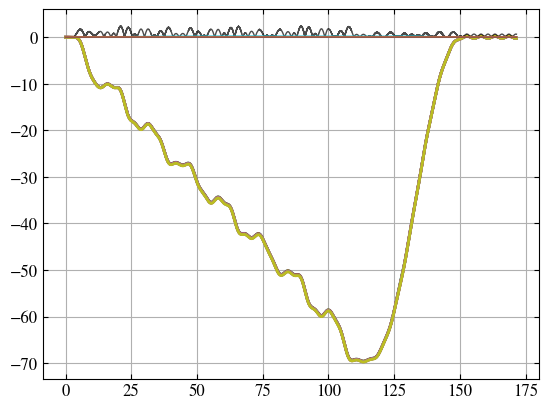

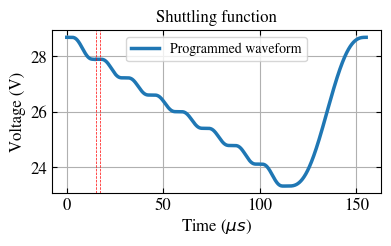

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.447939923265144
-0.7831736241762037
8.25826217795882
16.6207845274175
24.70915966081327
32.79753479420905
41.16005714366775
50.20149294580274
60.86625924489175
3000000
2.7123153879085304
[1.1247802268831386, 0.0020835903556317703, 3.748894963124048e-07, 2.241325832231546e-05, 3.7488945758648893e-07, 3.883401625479771e-06, 1.4995618055617397e-07, 7.342273738924555e-05, 2.2493363818200174e-07]
[235.84787876381606, 0.0008093219243547116, 2.6200113542156864e-11, 9.364974983646813e-08, 2.6200108129237318e-11, 2.8113909633433572e-09, 4.192039526156829e-12, 1.0049808182702706e-06, 9.432035876362257e-12]

Current final results:  [113.95230098887484, 39

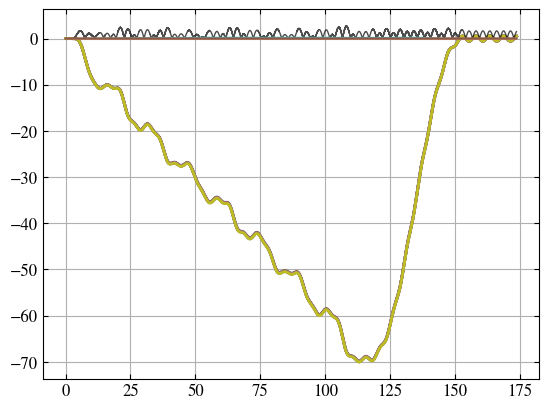

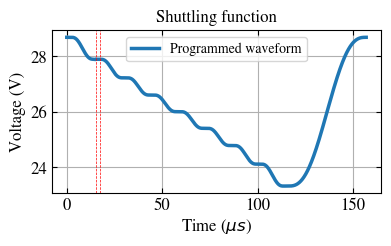

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.443266043331533
-0.7784987465045297
8.262937977705393
16.625461032507307
24.713836991833404
32.80221295115943
41.164736005961416
50.20617273017129
60.87094002699833
3000000
2.8573052175084017
[1.4731425287554596, 0.004019220616164887, 4.909988509842816e-07, 2.249490358757452e-05, 4.909990252337352e-07, 3.903848650808298e-06, 1.9639967208732763e-07, 7.34553527746985e-05, 2.945991543119717e-07]
[404.5630021950763, 0.003011482329582709, 4.494253652368188e-11, 9.433327248980823e-08, 4.494256842279451e-11, 2.8410741755037258e-09, 7.190815487228508e-12, 1.0058738690637568e-06, 1.6179295982974833e-11]

Current final results:  [113.95230098887484, 39.6

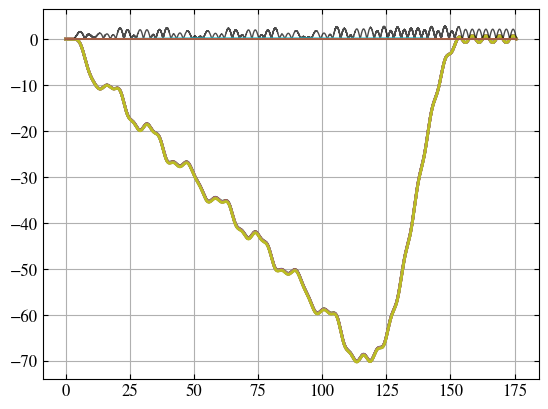

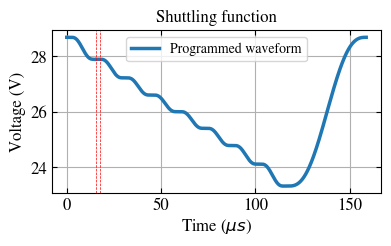

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.44778516694626
-0.7830227445561424
8.258409835492891
16.62092898477036
24.70930122139201
32.7976734580137
41.16019260729112
50.20162518734018
60.866387609730324
3000000
2.6272412964176612
[1.2497086144273122, 0.007002754618806506, 4.165280980974291e-07, 2.2621481596750664e-05, 4.165282340932474e-07, 3.941480435001984e-06, 1.6661141290893776e-07, 7.353649069365283e-05, 2.4991682750334857e-07]
[291.14823079863373, 0.009141857465004923, 3.234336747077185e-11, 9.539787916529585e-08, 3.2343388590900186e-11, 2.8961121703829464e-09, 5.1749495836942895e-12, 1.008097249242251e-06, 1.1643609367812557e-11]

Current final results:  [113.95230098887484, 39.

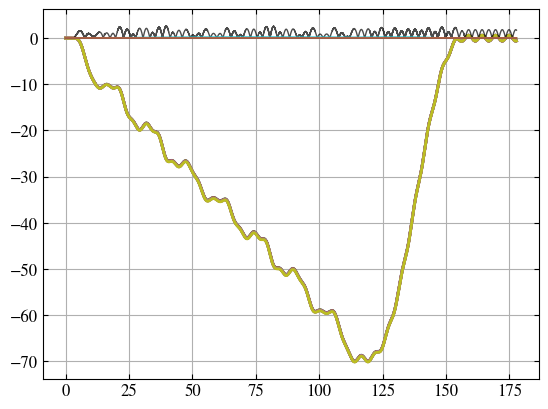

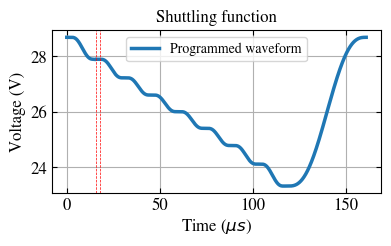

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.44719507230821
-0.7824333697178676
8.258998550165028
16.621517163915506
24.70988879315843
32.79826042240135
41.16077903615181
50.202210956034705
60.86697265862505
3000000
2.7116450321975814
[0.582908039938423, 0.005898134028367252, 1.9428338641378625e-07, 2.257597213341082e-05, 1.942833756820689e-07, 3.9273359567482385e-06, 7.771346734932606e-08, 7.350926248318593e-05, 1.1656999729082052e-07]
[63.342721596904354, 0.006485237761147299, 7.036682534122669e-12, 9.501442601379171e-08, 7.036681756745999e-12, 2.875363370957187e-09, 1.1258724733641766e-12, 1.007350855115207e-06, 2.5332042103351873e-12]

Current final results:  [113.95230098887484, 39.6

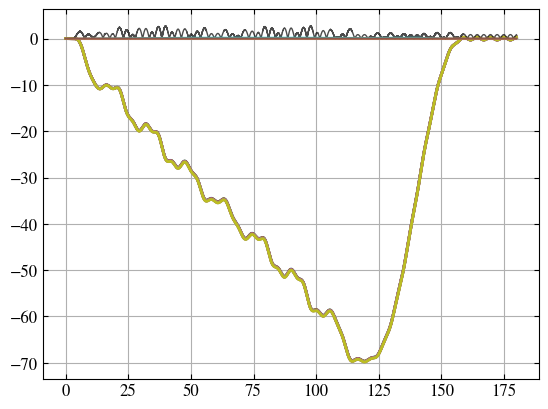

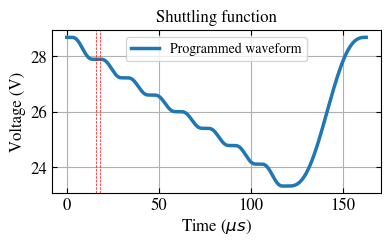

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.446270047132213
-0.781506202242609
8.259927490721601
16.62244790017791
24.710821133258047
32.799194366338185
41.16171477579449
50.20314846875868
60.867912313648276
3000000
2.872594726029283
[1.123605978961778, 0.007040984574178566, 3.744982865168212e-07, 2.2623437885738022e-05, 3.7449838421710803e-07, 3.942308817715863e-06, 1.4979927764024706e-07, 7.354842806475443e-05, 2.2469881744690368e-07]
[235.35569493472556, 0.009241945733249714, 2.614546067410303e-11, 9.541437975472554e-08, 2.614547431592428e-11, 2.8973296527009733e-09, 4.183271643215655e-12, 1.0084245699401812e-06, 9.412352902132393e-12]

Current final results:  [113.95230098887484, 39.

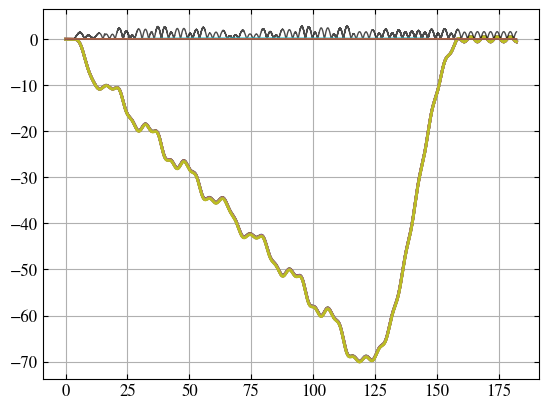

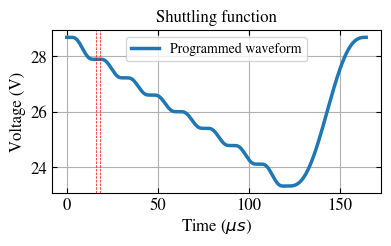

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.451206020041587
-0.7864416361928248
8.25499249676795
16.617513388754105
24.705887045954658
32.79426070315517
41.1567815951413
50.198215728102056
60.862980111950804
3000000
3.335935855538836
[1.9444783825940894, 0.0030428930307948576, 6.480949723056003e-07, 2.2454075797667932e-05, 6.480952036141349e-07, 3.893411527609988e-06, 2.592380742908828e-07, 7.343028674998127e-05, 3.8885692208185934e-07]
[704.8600024415663, 0.0017261160845777627, 7.830219438575647e-11, 9.399115731762691e-08, 7.830225027870381e-11, 2.8259029919011702e-09, 1.2528359353046458e-11, 1.0051874941052217e-06, 2.8188781091208898e-11]

Current final results:  [113.95230098887484, 3

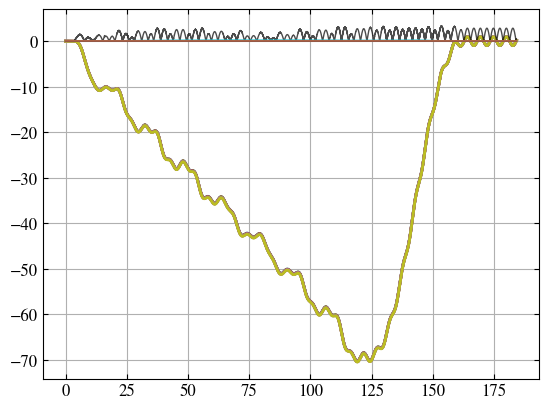

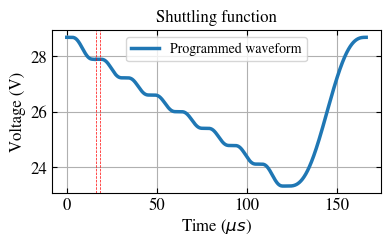

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.445250686397332
-0.7804829765783854
8.26095400619705
16.623477440186974
24.711853632675396
32.80022982516383
41.16275325915372
50.2041902419292
60.8689579517481
3000000
3.1465581477935327
[1.8518742752336126, 0.006570739281244187, 6.172300470978976e-07, 2.2604372752323978e-05, 6.172301194699465e-07, 3.9363410827901696e-06, 2.468920691674886e-07, 7.352130492807249e-05, 3.703379523039188e-07]
[639.3219657559627, 0.00804868811618357, 7.1021648341542e-11, 9.525363306347716e-08, 7.102166499653971e-11, 2.8885645309043676e-09, 1.1363468367475344e-11, 1.0076809349012053e-06, 2.556778291525582e-11]

Current final results:  [113.95230098887484, 39.616142

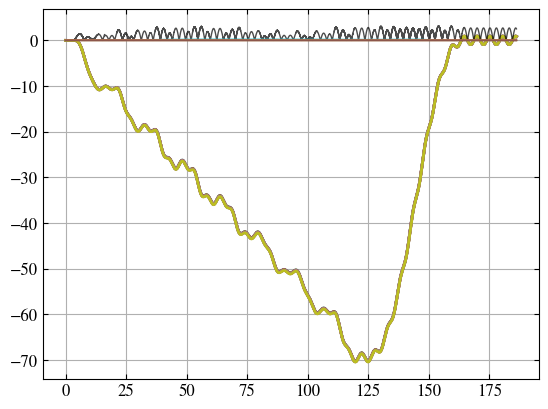

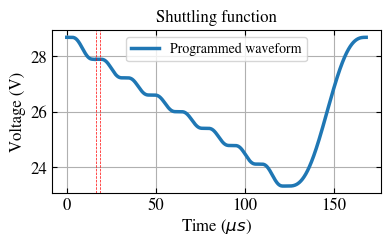

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.445722242769607
-0.7809523305793192
8.260486572305254
16.62301162139398
24.71138949551262
32.79976736963124
41.162292418720014
50.203731321604565
60.868501233794845
3000000
3.2729589217626835
[0.8108545692115898, 0.007442204722728718, 2.702582314239334e-07, 2.2631228042125392e-05, 2.7025816765746476e-07, 3.946375174963747e-06, 1.0810319361429738e-07, 7.353763739147113e-05, 1.6215477269860348e-07]
[122.5695425036581, 0.010325232828976358, 1.36161550833728e-11, 9.548010105812982e-08, 1.3616148658006813e-11, 2.9033097289079357e-09, 2.1785808248882756e-12, 1.0081286891958958e-06, 4.90180578450457e-12]

Current final results:  [113.95230098887484, 3

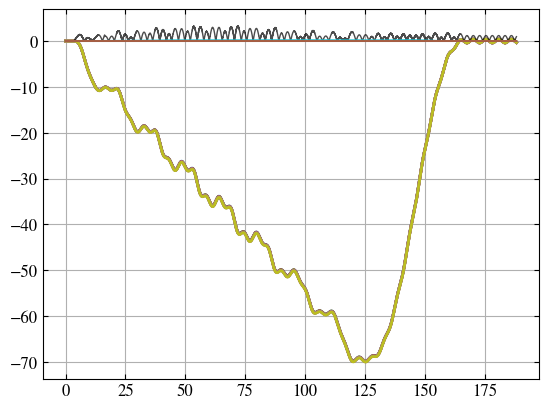

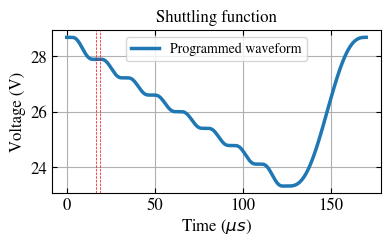

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.447074355633822
-0.7823083930220305
8.259127183688564
16.62164910707721
24.710024011937406
32.79839891679755
41.1609208401862
50.20235641689676
60.867122379508636
3000000
3.6348155527865735
[1.1851308034568868, 0.0058609091293106985, 3.9500477041685834e-07, 2.25659190610767e-05, 3.9500446185579086e-07, 3.929045763996822e-06, 1.5800223885913136e-07, 7.350520757293158e-05, 2.3700254542100445e-07]
[261.8359054904077, 0.0064036355096724175, 2.9087159311048902e-11, 9.492982507438003e-08, 2.908711386774242e-11, 2.8778675556632893e-09, 4.6539649708737954e-12, 1.0072397234152338e-06, 1.0471349355396267e-11]

Current final results:  [113.95230098887484,

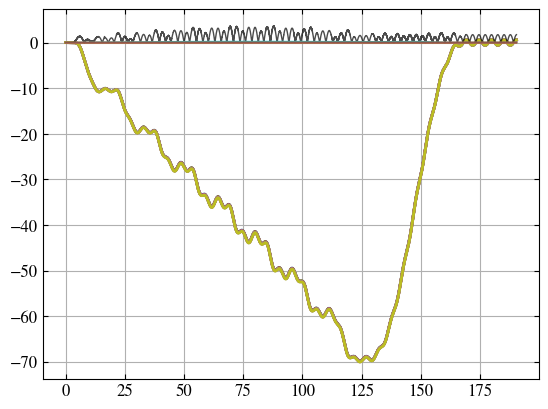

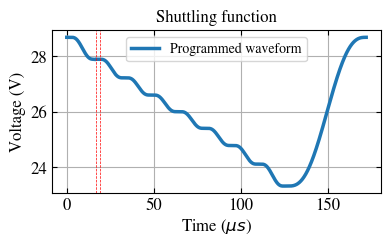

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.44117556366451
-0.7764118180392655
8.265021858766346
16.627542128529676
24.7159153647757
32.8042886010218
41.16680887078515
50.20824254759071
60.87300629321601
3000000
4.392096074323758
[2.6736145494688675, 0.0057285338521460005, 8.911161508064941e-07, 2.2565045797827443e-05, 8.911160659615916e-07, 3.92562794466545e-06, 3.564462904164433e-07, 7.348508305300727e-05, 5.346696308635663e-07]
[1332.582851769415, 0.006117635482751163, 1.4803528986767565e-10, 9.492247796626975e-08, 1.4803526167822103e-10, 2.8728629037219985e-09, 2.3685623798516175e-11, 1.0066882674918959e-06, 5.329269246716193e-11]

Current final results:  [113.95230098887484, 39.6161

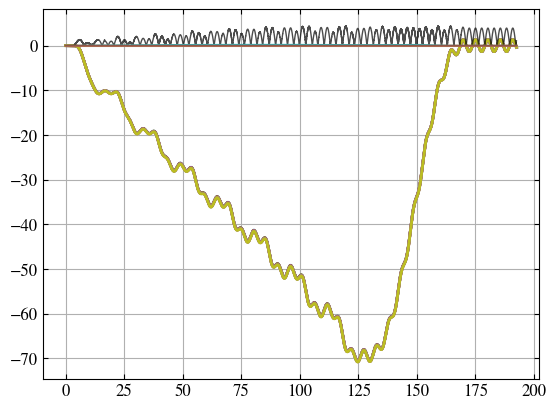

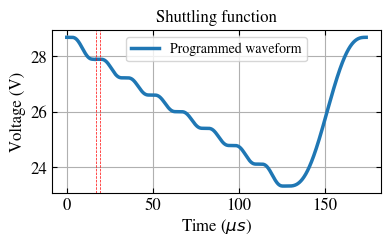

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.45023958013411
-0.785478109576613
8.255953590531783
16.618472167458425
24.706843636962507
32.7952151064666
41.15773368339324
50.199165383501644
60.863926854059116
3000000
5.85403416053165
[3.6110857968287524, 0.007054217419852904, 1.2035754379713758e-06, 2.2624372171487156e-05, 1.2035757923634352e-06, 3.939068895529802e-06, 4.814301203463301e-07, 7.347537640181568e-05, 7.221451923764124e-07]
[2430.9288206784604, 0.009276717053429251, 2.7004942752799117e-10, 9.542226062026193e-08, 2.7004958655979564e-10, 2.892569363373481e-09, 4.32078985604031e-11, 1.0064223379698384e-06, 9.721777495334832e-11]

Current final results:  [113.95230098887484, 39.61

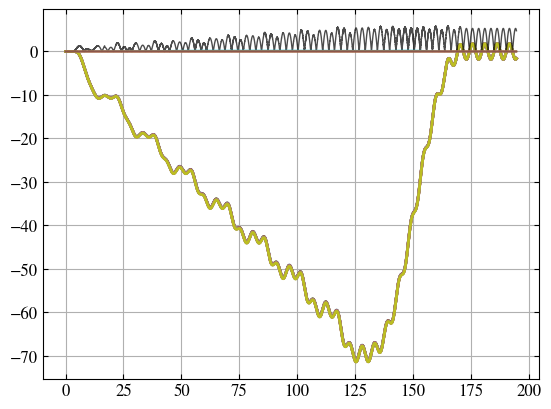

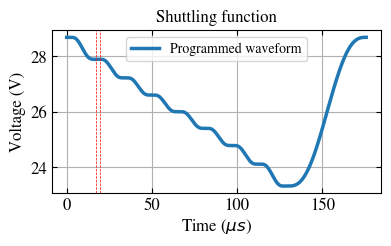

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.453722564340563
-0.7889557074503797
8.252480509401389
16.615003299932155
24.703378791569538
32.7917542832069
41.15427707373769
50.19571329058948
60.86048014747959
3000000
6.0737129924888364
[3.7785647566923504, 0.004894560581735874, 1.2593963261641518e-06, 2.253138178840981e-05, 1.2593962249847159e-06, 3.915564149661128e-06, 5.037585273886706e-07, 7.344072771438921e-05, 7.55637637513987e-07]
[2661.6464524165476, 0.004466054772314739, 2.9567967526149294e-10, 9.463946612446154e-08, 2.95679627751903e-10, 2.858151961032268e-09, 4.7308747463909005e-11, 1.005473367236284e-06, 1.0644463852808282e-10]

Current final results:  [113.95230098887484, 39.61

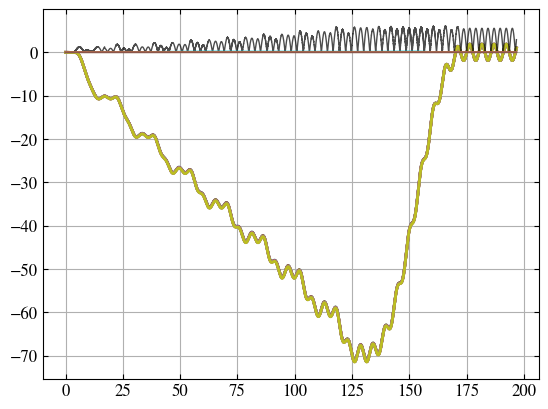

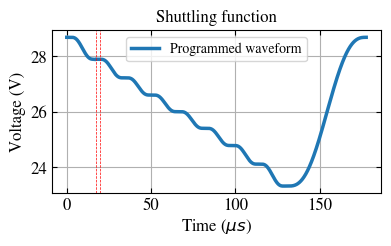

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.443148848199357
-0.7783844058539788
8.263049775344983
16.625570594960593
24.713944258818504
32.80231792267642
41.164838742292034
50.20627292349105
60.871037365836415
3000000
5.154449164453179
[3.2105384225289813, 0.0034038706821348796, 1.0700732345879148e-06, 2.2469603255280044e-05, 1.0700730477621788e-06, 3.899208474448883e-06, 4.280293908087484e-07, 7.34044208324391e-05, 6.420436986561673e-07]
[1921.5530191455898, 0.0021599452007597655, 2.1346350251472926e-10, 9.412119592104725e-08, 2.1346342797689162e-10, 2.834324297836311e-09, 3.41541758781744e-11, 1.00447946152894e-06, 7.684680295176493e-11]

Current final results:  [113.95230098887484, 39

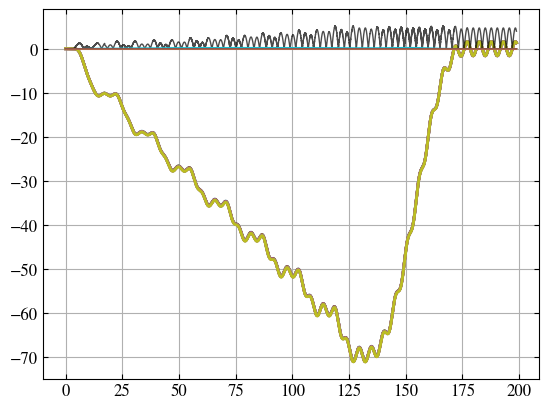

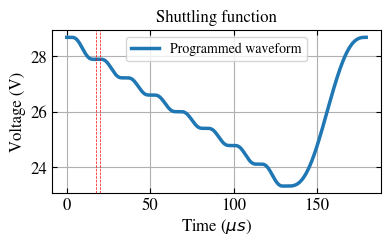

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.442670083460172
-0.7778980737335184
8.26354261201178
16.626069324170157
24.71444881180728
32.8028282994444
41.165355011602756
50.2067956973481
60.871567707074696
3000000
3.9219855134876007
[2.203405937143287, 0.011479917821482388, 7.343954601508845e-07, 2.281201185063027e-05, 7.343956006453965e-07, 3.990525554167562e-06, 2.937583042956327e-07, 7.362518335478016e-05, 4.4063728636740516e-07]
[905.0772717623831, 0.024568247968509014, 1.0054410103233594e-10, 9.701163084087829e-08, 1.0054413950178879e-10, 2.9686351194606046e-09, 1.608706933404656e-11, 1.0105304561099811e-06, 3.6195878060015954e-11]

Current final results:  [113.95230098887484, 39.61

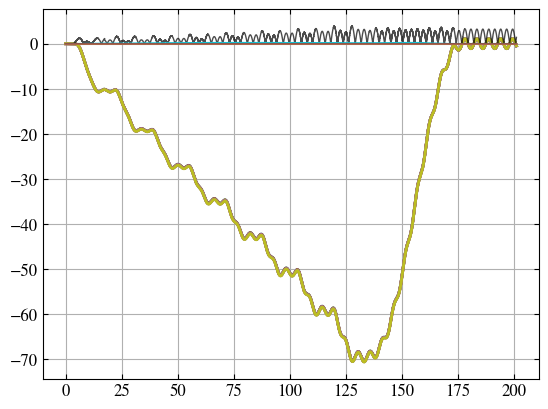

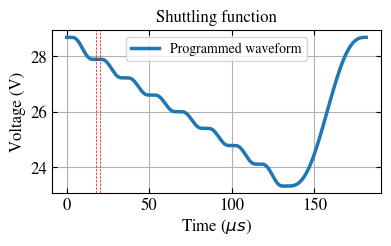

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.44708679850148
-0.7823215660726743
8.259113432032578
16.62163484581608
24.710009255175535
32.79838366453498
41.16090507831849
50.20234007642373
60.86710530885255
3000000
2.763697507823501
[1.2687687138286363, 0.0076615290231139, 4.22880925693941e-07, 2.2649908251267184e-05, 4.2288083661776045e-07, 3.947921856585338e-06, 1.6915246487506137e-07, 7.356936859573358e-05, 2.537284686560275e-07]
[300.0969284581349, 0.01094277653851047, 3.333748408412438e-11, 9.56377879813232e-08, 3.3337470039625045e-11, 2.905585932040333e-09, 5.334003419476033e-12, 1.0089988841080193e-06, 1.200148606266692e-11]

Current final results:  [113.95230098887484, 39.61614232

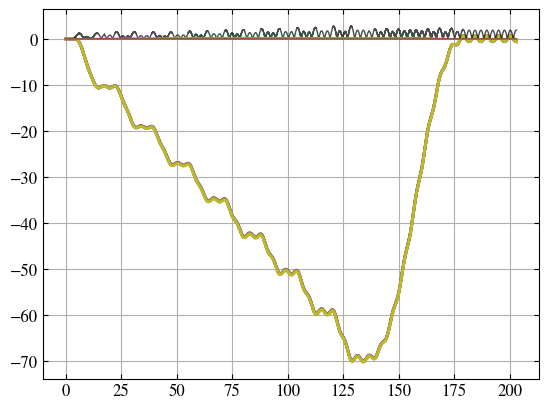

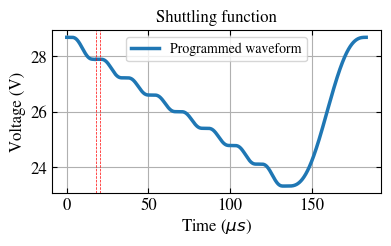

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.448205529801676
-0.7834440784818
8.257987655028355
16.62050613148416
24.70887762521567
32.79724911894719
41.15976759540298
50.201199328913106
60.865960780233
3000000
2.1122367542427023
[0.7478171520764825, 0.010379567314892313, 2.492477123785591e-07, 2.2763069304175e-05, 2.492477497193322e-07, 3.9792998468277975e-06, 9.969896070016054e-08, 7.364825797443852e-05, 1.4954854576713148e-07]
[104.25273864724238, 0.020084227309723243, 1.158134476798731e-11, 9.65958057981552e-08, 1.1581348238080545e-11, 2.9519565364290184e-09, 1.8530105441930313e-12, 1.0111639692317493e-06, 4.16927956325859e-12]

Current final results:  [113.95230098887484, 39.61614232

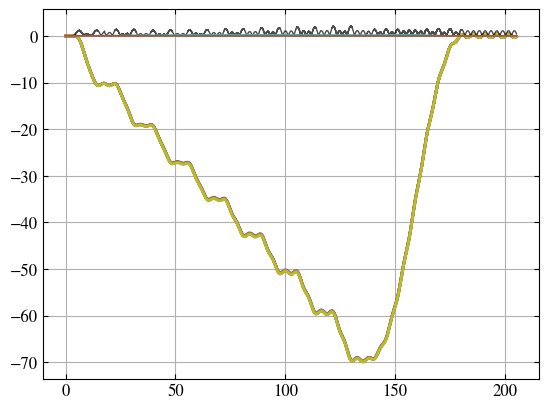

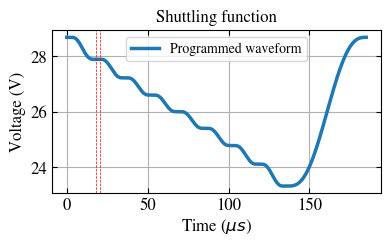

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05
-11.447435994336574
-0.7826739004862843
8.258758282463466
16.621277288432864
24.709649170638382
32.79802105284389
41.160540058813275
50.20197224176301
60.86673433561334
3000000
1.7088950066411939
[0.4084317792905652, 0.007735545296682744, 1.3613057837945924e-07, 2.2653658251831055e-05, 1.3613072438337092e-07, 3.951825733755328e-06, 5.4452309794234855e-08, 7.358950673601804e-05, 8.167822331251888e-08]
[31.09823070724036, 0.011155229138705472, 3.4546814485102344e-12, 9.566945887763683e-08, 3.4546888590021547e-12, 2.91133511312808e-09, 5.527506243141952e-13, 1.0095513461576982e-06, 1.2436815539386682e-12]

Current final results:  [113.95230098887484, 

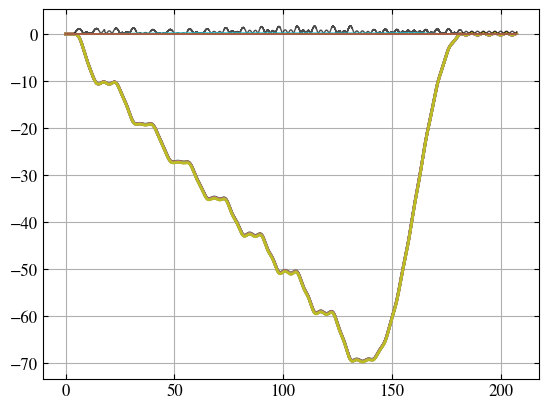

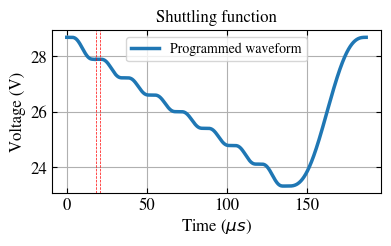

The initial position:  5.5703264876618514e-05
The trap frequency:  1183955.277443967
[19.461224455219217, 30.15104838108515, 39.21378958963747, 47.59584149386364, 55.70326487661851, 63.81068825937339, 72.19274016359955, 81.25548137215188, 91.94530529801781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1183955.277443967 5.5703264876618514e-05


KeyboardInterrupt: 

In [8]:
def pfit(x_data, y_data, degree, plot=False):
    """
    Polynomial fit of data.

    Parameters:
    - x_data: x data points
    - y_data: y data points
    - degree: Degree of the polynomial
    - plot: Boolean to plot the original data and the fit

    Returns:
    - coeffs: Coefficients of the polynomial fit
    """
    coeffs = np.polyfit(x_data, y_data, degree)
    poly = np.poly1d(coeffs)
    y_fit = poly(x_data)
    if plot:
        plt.plot(x_data, y_data, label='Original')
        plt.plot(x_data, y_fit, label='Fit')
        plt.legend()
        plt.show()
    return coeffs

def v_har(delta_x, x_data, y_data, plot=False):
    """
    Harmonic fit around a minimum point within a specified range.

    Parameters:
    - delta_x: Range around the minimum point to consider for the fit
    - x_data: x data points
    - y_data: y data points
    - plot: Boolean to plot the original data and the fit

    Returns:
    - coeffs: Coefficients of the polynomial fit
    """
    def mini(x_data, y_data):
        """Find the minimum point of the potential."""
        min_index = np.argmin(y_data)
        return x_data[min_index]

    min_x = mini(x_data, y_data)
    mask = (x_data >= min_x - delta_x) & (x_data <= min_x + delta_x)
    fit_x_data = x_data[mask]
    fit_y_data = y_data[mask]

    coeffs = np.polyfit(fit_x_data, fit_y_data, 2)  # Degree is always 2 for harmonic fit
    poly = np.poly1d(coeffs)
    y_fit = poly(x_data)

    if plot:
        plt.plot(x_data, y_data, label='Original')
        plt.plot(x_data, y_fit, label='Fit')
        plt.xlabel('x/m')
        plt.ylabel('Potential Energy/J')
        plt.legend()
        plt.show()

    return coeffs

def scale_voltage_array(voltage_array, original_min, original_max, new_min, new_max):
    """Scales the voltage array based on the original and new min/max values."""
    return ((voltage_array - original_min) / (original_max - original_min)) * (new_max - new_min) + new_min

def load_and_process_data(filepath, smooth = False, smooth_window = 100):
    """Loads the CSV, processes the data, and saves time and scaled voltage arrays."""
    # Load the CSV file
    df = pd.read_csv(filepath)
    if(smooth == True):
        df = df.groupby(np.arange(len(df)) // smooth_window).mean()

    # Extract arrays of time and voltage, apply scaling and corrections
    time_array = df['Time (us)'].to_numpy() * T_factor * 1e6
    voltage_array = df['Value'].to_numpy() * (-0.0682 * 1e6) + 20.17
    
    # Scale the first voltage array
    original_min, original_max = min(voltage_array), max(voltage_array)
    scaled_voltage_array = scale_voltage_array(voltage_array, original_min, original_max, 20.21, 25.59)
    
    # Save arrays
    np.save('time_array.npy', time_array)  # Unit: us
    np.save('DC1_voltage_array.npy', scaled_voltage_array)
    
    # Process for the second voltage array with different scaling
    voltage_array = -voltage_array
    original_min, original_max = min(voltage_array), max(voltage_array)
    scaled_voltage_array = scale_voltage_array(voltage_array, original_min, original_max, 23.33, 28.68)
    
    # Save the second voltage array
    np.save('DC2_voltage_array.npy', scaled_voltage_array)
    
    return time_array, scaled_voltage_array

def plot_voltage_time(time_array, scaled_voltage_array, pdf_filename):
    """Plots the voltage array over time and saves the plot to a PDF."""
    half_column_width_inches = 4.25
    aspect_ratio = 2
    plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))
    plt.title('Shuttling function', fontdict={'family': 'STIXGeneral', 'size': 12})
    plt.plot(time_array, scaled_voltage_array, 'C0', linewidth=2.5, label='Programmed waveform')
    plt.axvline(13 * T_factor, color='r', linewidth=0.5, linestyle='--')
    plt.axvline((15) * T_factor, color='r', linewidth=0.5, linestyle='--')
    plt.xlabel(r'Time ($\mu$$s$)', fontdict={'family': 'STIXGeneral', 'size': 12})
    plt.ylabel('Voltage (V)', fontdict={'family': 'STIXGeneral', 'size': 12})
    plt.grid(True)
    plt.legend()
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.show()

list = points = np.linspace(1.25, 1.7, 30)
results = []
total_results = []

for i in range(len(list)):
    # Parameters for the simulation
    T_factor = (121 / 133.93969396934) * list[i]  # The time factor for the simulation
    NUM_VOLTAGE_POINTS = 500  # The points for voltage sampling
    T = 150 * 1e-6 * T_factor # Total time duration in s unit
    points = 3000000  # Number of points at which to evaluate the solution
    filepath = 'shuttling_function.csv'
    # filepath = 'RigolDS0_123.csv'
    time_array, scaled_voltage_array = load_and_process_data(filepath, smooth = True, smooth_window = 10)
    # scaled_voltage_array = np.ones(len(scaled_voltage_array)) * scaled_voltage_array[0]

    # Displaying the first few elements to verify the extraction
    print(f"Length of time_array: {len(time_array)}, Length of scaled_voltage_array: {len(scaled_voltage_array)}")
    print(f"scaled_voltage_array_min = {min(scaled_voltage_array)}, scaled_voltage_array_max = {max(scaled_voltage_array)}")
    print("First 5 elements of time_array:", time_array[:5])
    print("First 5 elements of scaled_voltage_array:", scaled_voltage_array[:5])
    print("The time range = ", time_array[-1], " us")

    # Plotting
    time_array = np.load("time_array.npy") * 1e-6
    DC1_voltage_array = np.load("DC1_voltage_array.npy") * voltage_change_factor
    # DC1_voltage_array = np.ones(len(DC1_voltage_array)) * DC1_voltage_array[0]
    DC2_voltage_array = np.load("DC2_voltage_array.npy") * voltage_change_factor
    # DC2_voltage_array = np.ones(len(DC2_voltage_array)) * DC2_voltage_array[0]
    plot_voltage_time(time_array * 1e6, scaled_voltage_array, 'Shuttling_function_new.pdf')

    half_column_width_inches = 4.25
    aspect_ratio = 2

    data_dc1 = np.loadtxt('DC1.csv', delimiter=',', skiprows=9)
    data_dc2 = np.loadtxt('DC2.csv', delimiter=',', skiprows=9)

    # data_dc1 = DC1_voltage_array
    # data_dc2 = DC2_voltage_array

    def cal_omega(DC1, DC2, delta_x, plot):
        V1 = 1.6e-19 * DC1 * data_dc1[:, 3]
        V2 = 1.6e-19 * DC2 * data_dc2[:, 3]
        V = V1 + V2
        z = 1e-3 * data_dc1[:, 2]
        a, b, c = v_har(delta_x, z, V, plot)
        omega = np.sqrt(2 * a / m)
        x_0 = -b / (m * omega ** 2)
        return omega*1.10, x_0
        # return 1076322.9794945174, 5.5703264876617695e-05

    def ode_csv(t, y):
        # Unpack position and velocity variables
        x1, x2, x3, x4, x5, x6, x7, x8, x9, v1, v2, v3, v4, v5, v6, v7, v8, v9 = y

        # Determine the closest time index for 't' and calculate omega and x0 values
        index_t = np.argmin(np.abs(time_array - t))
        omega_value, x0_value = cal_omega(DC1_voltage_array[index_t], DC2_voltage_array[index_t], 1e-4, False)
        # omega_value = 1076322.9794945174

        # Print omega and x0 at the beginning of the simulation
        if t == 0:
            print(omega_value, x0_value)

        # Constants for the equations of motion
        a = -m * omega_value**2
        b = m * omega_value**2 * x0_value
        coulomb_factor = e**2 / (4 * np.pi * E0)

        # Derivatives of positions are the velocities
        dx_dt = [v1, v2, v3, v4, v5, v6, v7, v8, v9]

        # Calculate the derivatives of velocities (dv/dt) considering Coulomb repulsion
        dv_dt = [
            1/m * (a * x1 + b - coulomb_factor * (sum(1 / (x1 - x)**2 for x in [x2, x3, x4, x5, x6, x7, x8, x9]))),
            1/m * (a * x2 + b - coulomb_factor * (-1 / (x2 - x1)**2 + sum(1 / (x2 - x)**2 for x in [x3, x4, x5, x6, x7, x8, x9]))),
            1/m * (a * x3 + b - coulomb_factor * (sum(-1 / (x3 - x)**2 for x in [x1, x2]) + sum(1 / (x3 - x)**2 for x in [x4, x5, x6, x7, x8, x9]))),
            1/m * (a * x4 + b - coulomb_factor * (sum(-1 / (x4 - x)**2 for x in [x1, x2, x3]) + sum(1 / (x4 - x)**2 for x in [x5, x6, x7, x8, x9]))),
            1/m * (a * x5 + b - coulomb_factor * (sum(-1 / (x5 - x)**2 for x in [x1, x2, x3, x4]) + sum(1 / (x5 - x)**2 for x in [x6, x7, x8, x9]))),
            1/m * (a * x6 + b - coulomb_factor * (sum(-1 / (x6 - x)**2 for x in [x1, x2, x3, x4, x5]) + sum(1 / (x6 - x)**2 for x in [x7, x8, x9]))),
            1/m * (a * x7 + b - coulomb_factor * (sum(-1 / (x7 - x)**2 for x in [x1, x2, x3, x4, x5, x6]) + sum(1 / (x7 - x)**2 for x in [x8, x9]))),
            1/m * (a * x8 + b - coulomb_factor * (sum(-1 / (x8 - x)**2 for x in [x1, x2, x3, x4, x5, x6, x7]) + 1 / (x8 - x9)**2)),
            1/m * (a * x9 + b - coulomb_factor * (sum(-1 / (x9 - x)**2 for x in [x1, x2, x3, x4, x5, x6, x7, x8])))
        ]

        # Return the concatenated list of position and velocity derivatives
        return dx_dt + dv_dt

    def Eqposition3(N):
        # Define the equations to solve
        def func(u):
            return np.array([u[m] - np.sum(1 / (u[m] - u[:m])**2) + np.sum(1 / (u[m] - u[m+1:])**2) for m in range(N)])
        
        # Define the first-order derivative
        def dfunc(u):
            return np.array([1 + 2 * np.sum(1 / (u[m] - u[:m])**3) - 2 * np.sum(1 / (u[m] - u[m+1:])**3) for m in range(N)])
        
        # Define the second-order derivative (not used in newton method here but defined for completeness)
        def ddfunc(u):
            return np.array([np.sum(1 / (u[m] - u[:m])**4) - np.sum(1 / (u[m] - u[m+1:])**4) for m in range(N)])

        # Initial guess for the Newton method
        ni = np.arange(0, N)
        guess = 3.94 * (N**0.387) * np.sin(1 / 3 * np.arcsin(1.75 * N**(-0.982) * ((ni + 1) - (N + 1) / 2)))
        
        # Solve for the equilibrium positions using the Newton method
        x0 = newton(func, guess, fprime=dfunc, maxiter=100000)
        
        return np.round(x0, 5)

    # Initial conditions setup
    omega_value, x0_value = cal_omega(DC1_voltage_array[0], DC2_voltage_array[0], 1e-4, False)
    # print(omega_value, x0_value)
    x0 = x0_value
    print("The initial position: ", x0_value)
    omega0 = omega_value
    print("The trap frequency: ", omega0)
    l0 = math.pow(e**2 / (4 * math.pi * E0 * m * omega0**2), 1/3)

    # Calculate initial positions and scale
    initial_positions = Eqposition3(9) * l0
    initial_state = [x + x0 for x in initial_positions] + [0] * 9  # Append velocity initial conditions (zeros)

    # Convert units to micrometers (um) and back, demonstrating unit conversion without functional change
    initial_state_um = [x * 1e6 for x in initial_state]
    print(initial_state_um)  # In the unit of micrometers (um)
    initial_state = [x / 1e6 for x in initial_state_um]  # Convert back, though this step is redundant here
    # initial_state = np.array([17.08369540791233, 28.474782827470513, 38.13198316843803, 47.06403315776806, 55.70326488240171, 64.34249658649416, 73.274546588792, 82.93174692487013, 94.32283434541237, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) / 1e6

    # initial_state = np.array([17.083695539177068, 28.47478293928541, 38.131983453958746, 47.06403296135834, 55.70326497471302, 64.34249664063852, 73.27454636648979, 82.93174679858147, 94.3228342153568, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) / 1e6

    # initial_state = np.array([17.08369553804403, 28.474782951113287, 38.131983421221584, 47.06403299876212, 55.70326497124225, 64.3424966085964, 73.27454639684315, 82.93174678729447, 94.32283421644193, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) / 1e6

    # initial_state = np.array([17.083695539177068, 28.47478293928541, 38.13198342382467, 47.06403296135834, 55.70326497634435, 64.34249664063852, 73.27454636648979, 82.93174679858147, 94.3228342153568, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) / 1e6

    # Solve the differential equations using 'solve_ivp'
    # solution = solve_ivp(ode_csv, (0, T), initial_state, t_eval=np.linspace(0, T, points))
    solution = solve_ivp(ode_csv, (0, T), initial_state, method=method, t_eval=np.linspace(0, T, points), atol=1e-10, rtol=1e-8)

    # Extract time points and positions from the solution
    time_points = solution.t
    positions = solution.y[:9]  # Extracting only the positions of the ions

    # Time windows
    start_time_array = np.array([0, 13e-6, 25e-6, 37e-6, 49e-6, 61e-6, 73e-6, 85e-6, 97e-6, 140e-6]) * 1e6 * T_factor
    stop_time_array = np.array([2e-6, 15e-6, 27e-6, 39e-6, 51e-6, 63e-6, 75e-6, 87e-6, 99e-6, 150e-6]) * 1e6 * T_factor

    for i in range(9):
        if(True):
            plt.plot(time_points * 1e6, (positions[i] - positions[i][0]) * 1e6, lw=2, label=f'ion {i}')

    for i in range(9):
        print(np.average(positions[i]) * 1e6)

    # print([17.08366553858873, 28.47476582463269, 38.132043127702964, 47.06397638554019, 55.703264876617695, 64.3425533676952, 73.27448662553242, 82.9317639286027, 94.32286421464666])

    # Calculate amplitude in these time windows
    time_points_us = time_points * 1e6  # Convert time_points to microseconds
    amplitudes = []
    # start_time = time_points_us[-15000]
    start_time = time_points_us[0]
    stop_time = time_points_us[-1]

    def nor_cor9(positions_minus_x0_values):
        # Assuming positions_minus_x0_values is a 2D array where each column corresponds to x1 through x9
        
        # Coefficients for each y computation as rows in a matrix
        coefficients = np.array([
            [0.333384, 0.333368, 0.333329, 0.333377, 0.333383, 0.333377, 0.333329, 0.333368, 0.333384],
            [-0.533933, -0.376401, -0.24288, -0.119431, 6.89694e-19, 0.119431, 0.24288, 0.376401, 0.533933],
            [-0.553209, -0.096929, 0.165769, 0.30783, 0.353079, 0.30783, 0.165769, -0.096929, -0.553209],
            [-0.439418, 0.282817, 0.401852, 0.255804, -9.57488e-17, -0.255804, -0.401852, -0.282817, 0.439418],
            [0.281185, -0.510756, -0.187306, 0.22284, 0.388073, 0.22284, -0.187306, -0.510756, 0.281185],
            [0.146521, -0.501459, 0.258135, 0.400506, -9.81546e-17, -0.400506, -0.258135, 0.501459, -0.146521],
            [0.0613199, -0.340712, 0.527405, -0.0227322, -0.450561, -0.0227322, 0.527405, -0.340712, 0.0613199],
            [-0.0196748, 0.163883, -0.461312, 0.509813, 3.83695e-18, -0.509813, 0.461312, -0.163883, 0.0196748],
            [-0.0042412, 0.0501759, -0.219504, 0.493967, -0.640796, 0.493967, -0.219504, 0.0501759, -0.0042412]
        ])

        # Dot product of coefficients with positions_minus_x0_values to compute all y values at once
        positions_modes = np.dot(coefficients, positions_minus_x0_values)

        return positions_modes

    print(len(positions[1]))

    # Extract time points and positions from the solution
    time_points = solution.t
    positions = solution.y[:9]  # Extracting only the positions of the ions
    t_eval = np.linspace(0, T, points)
    dt = np.mean(np.diff(time_array))  # Assuming evenly spaced
    indices = np.floor((t_eval - time_array[0]) / dt).astype(int)
    indices = np.clip(indices, 0, len(time_array) - 1)  # Ensure indices are within bounds
    cal_omega_vectorized = np.vectorize(cal_omega, excluded=['eps', 'verbose'])
    omega_values, x0_values = cal_omega_vectorized(DC1_voltage_array[indices], DC2_voltage_array[indices], 1e-4, False)
    positions_um = positions * 1e6
    x0_value_array_um = np.array(x0_values) * 1e6

    positions_modes = nor_cor9(np.array([positions[0] - x0_values, positions[1] - x0_values, positions[2] - x0_values, positions[3] - x0_values, positions[4] - x0_values, positions[5] - x0_values, positions[6] - x0_values, positions[7] - x0_values, positions[8] - x0_values])) / 3

    factor = 0.34 * 1.0004196441454332
    for i, pos in enumerate(positions_modes, start=1):
        # plt.scatter(time_points * 1e6, pos * 1e6, s=0.2, label=f'Mode {i}')
        if(i != 2):
            if(i == 8):
                plt.plot(time_points * 1e6, np.abs(pos - pos[0]) * 1e6 / factor, lw=1, c="C1", label=f'Mode {i}')
                continue
            if(i == 1):
                plt.plot(time_points * 1e6, np.abs(pos - pos[0]) * 1e6 / factor, lw=1, c="black", alpha = 0.7, label=f'Mode {i}')
                print(np.max(np.abs(pos - pos[0]) * 1e6 / factor))
                continue
            plt.plot(time_points * 1e6, np.abs(pos - pos[0]) * 1e6 / factor, lw=1, label=f'Mode {i}')
        else:
            plt.plot(time_points * 1e6, np.abs(pos - pos[0]) * 1e6 / factor, lw=1, label=f'Mode {i}')

    # Calculate amplitude in these time windows
    time_points_us = time_points * 1e6  # Convert time_points to microseconds
    amplitudes = []
    # start_time = time_points_us[-15000 * 20]
    start_time = time_points_us[-15000 * 20]
    stop_time = time_points_us[-1]
    for i, pos in enumerate(positions_modes, start=1):
        mask = (time_points_us >= start_time) & (time_points_us <= stop_time)
        amplitude = (pos * 1e6)[mask].max() - (pos * 1e6)[mask].min()
        amplitudes.append(amplitude)
    print(amplitudes)
    quantum = h_bar * omega_value
    real_amplitudes = np.array(amplitudes) * 1e-6
    n_bar = [0.25 * m * omega_value**2 * amplitude**2 / quantum for amplitude in real_amplitudes]
    print(n_bar)
    results.append(n_bar[0])
    total_results.append(n_bar)
    print("\nCurrent final results: ", results)
print(results)

In [9]:
results

[113.95230098887484,
 39.61614232918734,
 235.84787876381606,
 404.5630021950763,
 291.14823079863373,
 63.342721596904354,
 235.35569493472556,
 704.8600024415663,
 639.3219657559627,
 122.5695425036581,
 261.8359054904077,
 1332.582851769415,
 2430.9288206784604,
 2661.6464524165476,
 1921.5530191455898,
 905.0772717623831,
 300.0969284581349,
 104.25273864724238,
 31.09823070724036]

In [10]:
list[:len(results)]

array([1.25      , 1.26551724, 1.28103448, 1.29655172, 1.31206897,
       1.32758621, 1.34310345, 1.35862069, 1.37413793, 1.38965517,
       1.40517241, 1.42068966, 1.4362069 , 1.45172414, 1.46724138,
       1.48275862, 1.49827586, 1.5137931 , 1.52931034])

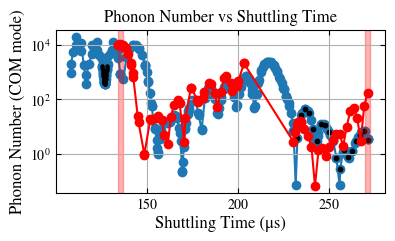

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 12,
         "xtick.direction": "in",
         "xtick.major.pad": 3,
         "xtick.top": True,
         "ytick.labelsize": 12,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 12,
         "axes.labelpad": 3,
         "axes.grid": True
    }
)

# Parameters for the simulation
T_factor = (121 / 133.93969396934) * 1.65  # The time factor for the simulation
NUM_VOLTAGE_POINTS = 500  # The points for voltage sampling
T = 150 * 1e-6 * T_factor  # Total time duration in s unit
points = 3000000  # Number of points at which to evaluate the solution

shuttling_time = np.array([2.0, 1.9, 1.8, 1.7, 1.69, 1.68, 1.675, 1.67, 1.66, 1.6, 1.55, 1.5, 1.45, 1.4, 1.35, 1.3, 1.275, 1.2725, 1.2625, 1.25625, 1.25, 1.24375, 1.2375, 1.225, 1.2, 1.175, 1.1725, 1.1625, 1.15, 1.125, 1.1, 1.075, 1.05, 1.025, 1.0]) * 150 * (121 / 133.93969396934)
phonon_number = [3.3162240810623347, 1.1686538823938188, 5.875925464087038, 6.619702650001575, 31.254016433807955, 71.98736367688507, 98.34855030356773, 130.87303629718585, 232.85274899348917, 2391.1302739952052, 147.44020081614985, 629.0087480609346, 268.18965217639294, 48.43543825010925, 206.2857621064642, 95.51753401638237, 36.50945323006546, 28.964561608089042, 7.96054386244553, 1.804352613489891, 0.22117266268485491, 2.8548644300358745, 9.033128088667297, 23.698891504359, 14.689732736191997, 15.435105237356863, 14.186253152704335, 5.481084714468514, 1.6131675500567202, 74.60439276513097, 1871.5136089051891, 7469.869215480245, 9689.46367839787, 3444.424286773976, 822.7717571937637]

shuttling_time_1 = np.array([1.7       , 1.71578947, 1.73157895, 1.74736842, 1.76315789,
                            1.77894737, 1.79473684, 1.81052632, 1.82631579, 1.84210526,
                            1.85789474, 1.87368421, 1.88947368, 1.90526316, 1.92105263,
                            1.93684211, 1.95263158, 1.96842105, 1.98421053, 2.        ]) * 150 * (121 / 133.93969396934)

phonon_number_1 = [6.622719944242334,
                    3.6665789980066514,
                    26.40020560905384,
                    43.26610387296418,
                    32.437882964454495,
                    8.074850695091568,
                    2.982109653755348,
                    11.948611462139123,
                    11.74439618130612,
                    6.192068357055268,
                    3.3273987358235915,
                    0.6739697827116691,
                    0.27495010337452586,
                    1.3850825169641057,
                    0.7593143279522443,
                    1.2361688787016312,
                    2.896015765885327,
                    4.935262779795991,
                    6.860069819101938,
                    3.3229333316504306]

shuttling_time_2 = np.array([1.5       , 1.50842105, 1.51684211, 1.52526316, 1.53368421,
                            1.54210526, 1.55052632, 1.55894737, 1.56736842, 1.57578947,
                            1.58421053, 1.59263158, 1.60105263, 1.60947368, 1.61789474,
                            1.62631579, 1.63473684, 1.64315789, 1.65157895, 1.66      ]) * 150 * (121 / 133.93969396934)

phonon_number_2 = [628.9188948472441,
                    715.8617235495441,
                    625.2224899922396,
                    398.8135916458048,
                    159.31460165015557,
                    49.08760383112478,
                    161.56191075045933,
                    504.30044461484954,
                    1005.1049082936939,
                    1549.1785151046683,
                    2017.1059972761366,
                    2313.9777111072726,
                    2387.4370778102857,
                    2231.2774143359843,
                    1892.4078850788678,
                    1454.499200018254,
                    1014.2565407174377,
                    648.0857324625774,
                    390.34507137128696,
                    232.89951946244153]

shuttling_time_3 = np.linspace(1.1, 1.16, 10) * 150 * (121 / 133.93969396934)
phonon_number_3 = [1871.4529251861752, 992.4690490748741, 451.1546616884751, 171.78240593044322, 55.796053192859674, 18.76592586005597, 8.314730748151963, 3.2465493956254425, 0.9834339791532549, 3.4605420534457125]
[1871.4529251861752, 992.4690490748741, 451.1546616884751, 171.78240593044322, 55.796053192859674, 18.76592586005597, 8.314730748151963, 3.2465493956254425, 0.9834339791532549, 3.4605420534457125]

shuttling_time_4 = np.linspace(1.0, 2.0, 80) * 150 * (121 / 133.93969396934)
phonon_number_4 = [822.8831820325785, 553.1855352141761, 3542.171964861885, 7418.750265052354, 9748.075347736132, 9550.291315380848, 7250.075046199817, 4158.847362108642, 1676.5578137796924, 417.3286389873755, 56.62349334331037, 9.04329312526159, 1.1110347310223108, 7.380877247751045, 15.97618959458514, 13.190498898531047, 16.456690491244057, 26.031210712333166, 20.983015437829177, 5.69234210323791, 0.4792879869919452, 13.311145676331547, 48.19142786474047, 90.1869494360309, 87.08293990635754, 27.439289193761844, 7.943963101493556, 110.59330008038978, 245.44588671044565, 249.18604885410141, 121.19406518440272, 30.174987850247856, 90.65755646185869, 248.02176020203984, 366.8975992970766, 345.02453786359933, 187.05368708804002, 53.45598584149631, 153.89604931299039, 477.0539761262665, 710.1349472245089, 576.5589089972765, 210.53031634995466, 55.093199254533324, 405.46048180363704, 1151.5731883360443, 1922.1306278358686, 2357.619586558614, 2284.2525232653193, 1775.4381028688915, 1105.4180049957135, 562.8893512682979, 259.0906372646809, 124.47093631889408, 55.891271781258354, 13.86489918227468, 0.0674895740823596, 10.593581390571051, 30.409641898581075, 43.07678390368917, 37.392256734106184, 17.760404734702387, 3.106450318201271, 4.344128275799964, 11.791978557101324, 12.772113827422457, 8.299232790727718, 4.895337790600413, 2.853086195149589, 0.7113415941668045, 0.06745745452049429, 1.0813954662514385, 1.2722384550374848, 0.6668664137922837, 1.2210296544611676, 2.5616014949176296, 3.95699332661789, 6.022500602985368, 6.629504719797712, 3.3229333316504306]

shuttling_time_5 = np.array([1.25      , 1.26315789, 1.27631579, 1.28947368, 1.30263158,
                    1.31578947, 1.32894737, 1.34210526, 1.35526316, 1.36842105,
                    1.38157895, 1.39473684, 1.40789474, 1.42105263, 1.43421053,
                    1.44736842, 1.46052632, 1.47368421, 1.48684211, 1.5       ]) * 150 * (121 / 133.93969396934)
phonon_number_5 = [0.21557833883358168,
                    8.889765338956778,
                    40.75899549486657,
                    85.97241022810252,
                    90.36925017194477,
                    30.741205457865956,
                    7.4235807726708,
                    114.52988917197142,
                    251.0120685367646,
                    239.6263609060765,
                    101.36244663037469,
                    29.40305106016917,
                    121.99408817955025,
                    288.4724147117752,
                    377.5509234345375,
                    301.3072286120741,
                    120.33170525893043,
                    59.96463300694118,
                    289.01736659950575,
                    628.9188948472441]

shuttling_time_0 = np.array([1.7       , 1.71578947, 1.73157895, 1.74736842, 1.76315789,
                            1.77894737, 1.79473684, 1.81052632, 1.82631579, 1.84210526,
                            1.85789474, 1.87368421, 1.88947368, 1.90526316, 1.92105263,
                            1.93684211, 1.95263158, 1.96842105, 1.98421053, 2.        ]) * 150 * (121 / 133.93969396934)
phonon_number_0 = [6.611800019088033,
                    3.6582972482942595,
                    26.369318017544657,
                    43.184343173550495,
                    32.4023308321295,
                    8.073363888764545,
                    2.9772072524057354,
                    11.940665437935861,
                    11.725732978507285,
                    6.1844655645330295,
                    3.3125373916212957,
                    0.6704987522671576,
                    0.2719823324680728,
                    1.38020543375336,
                    0.7582715754115237,
                    1.2323576315610096,
                    2.8905536554362423,
                    4.920834741776568,
                    6.82717941312589,
                    3.3061360201165386]

phonon_number_6 = [960.412857263177,
                    5565.232793973766,
                    9689.214239600225,
                    9624.276920402259,
                    5825.74543517543,
                    1763.4641674800007,
                    379.6590828241329,
                    1960.0707266309487,
                    4732.660373963657,
                    6621.267216334895,
                    6431.442126373816,
                    4289.753644587272,
                    1612.4612789634377,
                    376.0004976343955,
                    1649.6030567060948,
                    4488.424703040916,
                    6522.137598909649,
                    6008.294403782537,
                    3384.3072592824346,
                    822.8831820325785]
shuttling_time_6 = np.array([0.8       , 0.81052632, 0.82105263, 0.83157895, 0.84210526,
                            0.85263158, 0.86315789, 0.87368421, 0.88421053, 0.89473684,
                            0.90526316, 0.91578947, 0.92631579, 0.93684211, 0.94736842,
                            0.95789474, 0.96842105, 0.97894737, 0.98947368, 1.        ]) * 150 * (121 / 133.93969396934)

phonon_number_7 = [925.5835720576033,
                540.9867789523305,
                379.5372771205698,
                459.00594628758756,
                776.7624213452759,
                1311.9872709975712,
                2025.5274353012371]
shuttling_time_7 = np.array([0.93, 0.93315789, 0.93631579, 0.93947368, 0.94263158, 0.94578947, 0.94894737]) * 150 * (121 / 133.93969396934)

phonon_number_8 = [540.7838157182764,
                    484.81804175249084,
                    440.35394049977776,
                    407.19763007056184,
                    385.5767372568061,
                    376.54684034588297,
                    379.40067427425936,
                    393.4928146330621,
                    420.26803538991174,
                    459.04890258792]
shuttling_time_8 = np.array([0.93315789, 0.93385964, 0.9345614 , 0.93526315, 0.93596491, 0.93666666, 0.93736842, 0.93807017, 0.93877193, 0.93947368]) * 150 * (121 / 133.93969396934)

phonon_number_9 = [1652.4772295961702,
                    1416.916987380497,
                    1201.199446708044,
                    1006.5449084799493,
                    835.9621789276681,
                    690.6854743866578,
                    572.1272837340895,
                    481.70899237514504,
                    420.50727639426356,
                    389.4163396944165,
                    388.6817234402452,
                    418.93463545608853,
                    479.6264969829406,
                    570.3723559646336,
                    690.9544373690151,
                    839.8290183040909,
                    1016.232803286527,
                    1217.3605466777492,
                    1443.1019558783248,
                    1690.3865706072002]
shuttling_time_9 = np.array([0.92631579, 0.92742382, 0.92853186, 0.92963989, 0.93074792,
                            0.93185596, 0.93296399, 0.93407202, 0.93518006, 0.93628809,
                            0.93739612, 0.93850415, 0.93961219, 0.94072022, 0.94182825,
                            0.94293629, 0.94404432, 0.94515235, 0.94626039, 0.94736842]) * 150 * (121 / 133.93969396934)

phonon_number_10 = [1920.456286688493,
                    19406.050090061202,
                    11549.868445267326,
                    769.5182118228291,
                    9581.306724941125,
                    12788.971323715221,
                    3075.80833112831,
                    3486.6881439897925,
                    13118.459178404775,
                    6465.730063659422]
shuttling_time_10 = np.array([0.8       , 0.82111111, 0.84222222, 0.86333333, 0.88444444,
                            0.90555556, 0.92666667, 0.94777778, 0.96888889, 0.99      ]) * 150 * (121 / 133.93969396934)

phonon_number_11 = [9568.328141283175,
                    8563.478251157201,
                    1786.557164266618,
                    24.143707752822532,
                    0.9226381644066272,
                    17.15466195231177,
                    25.125977877617014,
                    4.99492143709375,
                    22.376485596003374,
                    95.46146530501147,
                    2.5974705857599454,
                    257.4997523929176,
                    80.11713138534785,
                    180.32989742056165,
                    372.23198390284574,
                    52.30088213756731,
                    585.1094444973797,
                    401.2456461285471,
                    295.58568261081183,
                    2081.683960353963]
shuttling_time_11 = np.array([0.99      , 1.01684211, 1.04368421, 1.07052632, 1.09736842,
                            1.12421053, 1.15105263, 1.17789474, 1.20473684, 1.23157895,
                            1.25842105, 1.28526316, 1.31210526, 1.33894737, 1.36578947,
                            1.39263158, 1.41947368, 1.44631579, 1.47315789, 1.5       ]) * 150 * (121 / 133.93969396934)

phonon_number_12 = [2.726979296482458,
                    6.20912002423036,
                    10.86111341545978,
                    14.362937801097196,
                    15.40970522868022,
                    14.086232480250871]
shuttling_time_12 = np.array([1.7       , 1.70612245, 1.7122449 , 1.71836735, 1.7244898 , 1.73061224]) * 150 * (121 / 133.93969396934)

phonon_number_13 = [9567.73064611388,
                    10735.330424443164,
                    9832.64787629046,
                    7423.384802129073,
                    4507.598029273467,
                    2082.1323897876505,
                    659.918578995693]
shuttling_time_13 = np.array([0.99      , 1.00040816, 1.01081633, 1.02122449, 1.03163265, 1.04204082, 1.05244898]) * 150 * (121 / 133.93969396934)

phonon_number_14 = [901.7163254961342,
                    14.277885527396183,
                    0.9363572309346078,
                    18.154305170914057,
                    19.969890977981976,
                    16.9619135738993,
                    2.286897905772318,
                    59.259627176040254,
                    74.33825567929853,
                    20.504558432119925,
                    266.7064531471633,
                    97.0870707143194,
                    115.55097127559138,
                    385.08659426655197,
                    169.21136800818573,
                    181.01348086765677,
                    738.1633370739263,
                    197.28639927428566,
                    453.17792272569903,
                    2081.6519058654426]
shuttling_time_14 = np.array([1.05      , 1.07368421, 1.09736842, 1.12105263, 1.14473684,
                            1.16842105, 1.19210526, 1.21578947, 1.23947368, 1.26315789,
                            1.28684211, 1.31052632, 1.33421053, 1.35789474, 1.38157895,
                            1.40526316, 1.42894737, 1.45263158, 1.47631579, 1.5       ]) * 150 * (121 / 133.93969396934)

phonon_number_15 = [14.303644720707341,
                8.123262964216096,
                4.550113912206718,
                1.7715779668291562,
                0.06542574863248608,
                1.3336742424373118,
                1.609921396344434,
                0.8405368670945713,
                1.7265657280517224,
                3.1097152303331055,
                5.163504234090552,
                5.49155396841289,
                1.855050510487784,
                9.442146094503748,
                36.26556079705349,
                48.25401199884358,
                21.046207410563675,
                2.8340693671259762,
                58.14776920559573,
                176.9946765499624]
shuttling_time_15 = np.array([1.73      , 1.74421053, 1.75842105, 1.77263158, 1.78684211,
                        1.80105263, 1.81526316, 1.82947368, 1.84368421, 1.85789474,
                        1.87210526, 1.88631579, 1.90052632, 1.91473684, 1.92894737,
                        1.94315789, 1.95736842, 1.97157895, 1.98578947, 2.        ]) * 150 * (121 / 133.93969396934)

merged_shuttling_time = np.concatenate((shuttling_time, shuttling_time_1, shuttling_time_2, shuttling_time_3, shuttling_time_4, shuttling_time_5, shuttling_time_6, shuttling_time_7, shuttling_time_8, shuttling_time_9, shuttling_time_10))
merged_phonon_number = np.concatenate((phonon_number, phonon_number_1, phonon_number_2, phonon_number_3, phonon_number_4, phonon_number_5, phonon_number_6, phonon_number_7, phonon_number_8, phonon_number_9, phonon_number_10))

# combined = list(zip(merged_shuttling_time, merged_phonon_number))
# sorted_combined = sorted(combined, key=lambda x: x[0])
# merged_shuttling_time, merged_phonon_number = zip(*sorted_combined)

merged_shuttling_time = merged_shuttling_time.tolist()
merged_phonon_number = merged_phonon_number.tolist()

sorted_pairs = sorted(zip(merged_shuttling_time, merged_phonon_number))
merged_shuttling_time_sorted, merged_phonon_number_sorted = zip(*sorted_pairs)

# Plotting settings
half_column_width_inches = 4.25
aspect_ratio = 2  # Desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))

plt.plot(merged_shuttling_time_sorted, merged_phonon_number_sorted, marker='o', linestyle='-', color='C0', zorder=0)
plt.scatter(shuttling_time_0, phonon_number_0, c="black", s=10, zorder=1)
plt.scatter(shuttling_time_8, phonon_number_8, c="black", s=5, zorder=1)
plt.scatter(shuttling_time_9, phonon_number_9, c="black", s=5, zorder=1)
# plt.scatter(shuttling_time_10, phonon_number_10, c="red", s=5, zorder=2)
merged_shuttling_time_5 = np.concatenate((shuttling_time_11, shuttling_time_12, shuttling_time_13, shuttling_time_14, shuttling_time_15))
merged_phonon_number_5 = np.concatenate((phonon_number_11, phonon_number_12, phonon_number_13, phonon_number_14, phonon_number_15))
merged_shuttling_time_5 = merged_shuttling_time_5.tolist()
merged_phonon_number_5 = merged_phonon_number_5.tolist()
sorted_pairs_5 = sorted(zip(merged_shuttling_time_5, merged_phonon_number_5))
merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5 = zip(*sorted_pairs_5)
plt.plot(merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5, marker='o', linestyle='-', c="red", zorder=2)
# plt.plot(shuttling_time_1, phonon_number_1, marker='o', linestyle='-', color='C0')

# Highlight the time windows
time = 150 * (121 / 133.93969396934)
start = time * 0.99
stop = time * 1.01
plt.axvspan(start, stop, color='red', alpha=0.3)

time = 150 * (121 / 133.93969396934) * 2
start = time * 0.995
stop = time * 1.005
plt.axvspan(start, stop, color='red', alpha=0.3)

# plt.xlim(100, 150)
# plt.ylim(100, 2000)

plt.xlabel('Shuttling Time (μs)', fontsize=12)
plt.ylabel('Phonon Number (COM mode)', fontsize=12)
plt.title('Phonon Number vs Shuttling Time', fontsize=12)
plt.yscale('log')
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

pdf_filename = 'Phonon_number_vs_shuttling_time.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# plt.legend()
plt.show()

In [ ]:
150 * (121 / 133.93969396934)

135.50874622839365

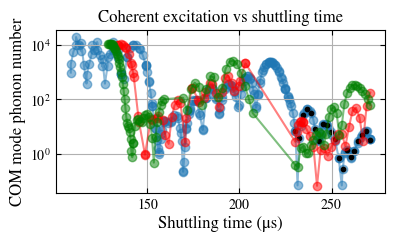

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 12,
         "xtick.direction": "in",
         "xtick.major.pad": 3,
         "xtick.top": True,
         "ytick.labelsize": 12,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 12,
         "axes.labelpad": 3,
         "axes.grid": True
    }
)

# Parameters for the simulation
T_factor = (121 / 133.93969396934) * 1.65  # The time factor for the simulation
NUM_VOLTAGE_POINTS = 500  # The points for voltage sampling
T = 150 * 1e-6 * T_factor  # Total time duration in s unit
points = 3000000  # Number of points at which to evaluate the solution

shuttling_time = np.array([2.0, 1.9, 1.8, 1.7, 1.69, 1.68, 1.675, 1.67, 1.66, 1.6, 1.55, 1.5, 1.45, 1.4, 1.35, 1.3, 1.275, 1.2725, 1.2625, 1.25625, 1.25, 1.24375, 1.2375, 1.225, 1.2, 1.175, 1.1725, 1.1625, 1.15, 1.125, 1.1, 1.075, 1.05, 1.025, 1.0]) * 150 * (121 / 133.93969396934)
phonon_number = [3.3162240810623347, 1.1686538823938188, 5.875925464087038, 6.619702650001575, 31.254016433807955, 71.98736367688507, 98.34855030356773, 130.87303629718585, 232.85274899348917, 2391.1302739952052, 147.44020081614985, 629.0087480609346, 268.18965217639294, 48.43543825010925, 206.2857621064642, 95.51753401638237, 36.50945323006546, 28.964561608089042, 7.96054386244553, 1.804352613489891, 0.22117266268485491, 2.8548644300358745, 9.033128088667297, 23.698891504359, 14.689732736191997, 15.435105237356863, 14.186253152704335, 5.481084714468514, 1.6131675500567202, 74.60439276513097, 1871.5136089051891, 7469.869215480245, 9689.46367839787, 3444.424286773976, 822.7717571937637]

phonon_number_m1 = [10917.831148500894,
                    11204.503136766143,
                    11221.463603616474,
                    10976.710727993826,
                    10497.448718693766,
                    9807.351445832617,
                    8952.06622021338,
                    7974.972236816406,
                    6925.580488995814,
                    5850.266637011716,
                    4798.422598099715,
                    3809.8871368057257,
                    2919.352046646958,
                    2149.1673189952176,
                    1513.7667508605855,
                    1012.5287491080555,
                    638.4661190901367,
                    376.151101137252,
                    204.90507923133984,
                    102.44126052633757,
                    47.743716397042185,
                    22.646531404729735,
                    13.255639171075677,
                    10.228019391596268,
                    8.48703605235511,
                    6.144718720750942,
                    3.3450319915578635,
                    1.2033559675156116,
                    0.7353332177622804,
                    2.394402975256187]
shuttling_time_m1 = np.array([0.95      , 0.95344828, 0.95689655, 0.96034483, 0.9637931 ,
                            0.96724138, 0.97068966, 0.97413793, 0.97758621, 0.98103448,
                            0.98448276, 0.98793103, 0.99137931, 0.99482759, 0.99827586,
                            1.00172414, 1.00517241, 1.00862069, 1.01206897, 1.01551724,
                            1.01896552, 1.02241379, 1.02586207, 1.02931034, 1.03275862,
                            1.0362069 , 1.03965517, 1.04310345, 1.04655172, 1.05      ]) * 150 * (121 / 133.93969396934)

phonon_number_m2 = [0.3823764422417888,
                    0.32502324693579593,
                    1.5604419259381792,
                    1.792498084359018,
                    1.0318683761106808,
                    1.062220981374216,
                    2.0513344908511355,
                    3.1387355842567772,
                    4.653112466975929,
                    6.184761799729591,
                    5.07039360145654,
                    1.9932146360298484,
                    5.471828005631268,
                    22.71604802042077,
                    44.84689894517717,
                    50.27710133536522,
                    30.064086981391384,
                    4.993464381091826,
                    11.364863358670137,
                    68.71847503201228,
                    163.59522658303385,
                    261.3414385227494,
                    328.3085727409664,
                    346.77267259278347,
                    319.2808926109196,
                    264.0782736347852,
                    203.4337857971246,
                    150.28598330503823,
                    104.51495652989107,
                    62.36201898299608]
shuttling_time_m2 = np.array([1.7       , 1.71034483, 1.72068966, 1.73103448, 1.74137931,
                            1.75172414, 1.76206897, 1.77241379, 1.78275862, 1.79310345,
                            1.80344828, 1.8137931 , 1.82413793, 1.83448276, 1.84482759,
                            1.85517241, 1.86551724, 1.87586207, 1.8862069 , 1.89655172,
                            1.90689655, 1.91724138, 1.92758621, 1.93793103, 1.94827586,
                            1.95862069, 1.96896552, 1.97931034, 1.98965517, 2.        ]) * 150 * (121 / 133.93969396934)

phonon_number_m3 = [2.394402975256187,
                    10.341679736630129,
                    17.746883266992494,
                    18.879801967995178,
                    15.84125682167082,
                    15.085175921693596,
                    19.641559461240366,
                    25.98851885910303,
                    27.73577448866504,
                    22.197012471177697,
                    12.312911991024604,
                    3.7304676142863125,
                    0.46682114117097395,
                    3.93242312592925,
                    14.832571322170065,
                    34.3920546457663,
                    61.34957692396912,
                    88.05185399543221,
                    100.43843946007372]
shuttling_time_m3 = np.array([1.05      , 1.05689655, 1.0637931 , 1.07068966, 1.07758621,
                            1.08448276, 1.09137931, 1.09827586, 1.10517241, 1.11206897,
                            1.11896552, 1.12586207, 1.13275862, 1.13965517, 1.14655172,
                            1.15344828, 1.16034483, 1.16724138, 1.17413793]) * 150 * (121 / 133.93969396934)

phonon_number_m4 = [113.95230098887484,
                    39.61614232918734,
                    235.84787876381606,
                    404.5630021950763,
                    291.14823079863373,
                    63.342721596904354,
                    235.35569493472556,
                    704.8600024415663,
                    639.3219657559627,
                    122.5695425036581,
                    261.8359054904077,
                    1332.582851769415,
                    2430.9288206784604,
                    2661.6464524165476,
                    1921.5530191455898,
                    905.0772717623831,
                    300.0969284581349,
                    104.25273864724238,
                    31.09823070724036]
shuttling_time_m4 = np.array([1.25      , 1.26551724, 1.28103448, 1.29655172, 1.31206897,
                            1.32758621, 1.34310345, 1.35862069, 1.37413793, 1.38965517,
                            1.40517241, 1.42068966, 1.4362069 , 1.45172414, 1.46724138,
                            1.48275862, 1.49827586, 1.5137931 , 1.52931034])  * 150 * (121 / 133.93969396934)

shuttling_time_1 = np.array([1.7       , 1.71578947, 1.73157895, 1.74736842, 1.76315789,
                            1.77894737, 1.79473684, 1.81052632, 1.82631579, 1.84210526,
                            1.85789474, 1.87368421, 1.88947368, 1.90526316, 1.92105263,
                            1.93684211, 1.95263158, 1.96842105, 1.98421053, 2.        ]) * 150 * (121 / 133.93969396934)

phonon_number_1 = [6.622719944242334,
                    3.6665789980066514,
                    26.40020560905384,
                    43.26610387296418,
                    32.437882964454495,
                    8.074850695091568,
                    2.982109653755348,
                    11.948611462139123,
                    11.74439618130612,
                    6.192068357055268,
                    3.3273987358235915,
                    0.6739697827116691,
                    0.27495010337452586,
                    1.3850825169641057,
                    0.7593143279522443,
                    1.2361688787016312,
                    2.896015765885327,
                    4.935262779795991,
                    6.860069819101938,
                    3.3229333316504306]

shuttling_time_2 = np.array([1.5       , 1.50842105, 1.51684211, 1.52526316, 1.53368421,
                            1.54210526, 1.55052632, 1.55894737, 1.56736842, 1.57578947,
                            1.58421053, 1.59263158, 1.60105263, 1.60947368, 1.61789474,
                            1.62631579, 1.63473684, 1.64315789, 1.65157895, 1.66      ]) * 150 * (121 / 133.93969396934)

phonon_number_2 = [628.9188948472441,
                    715.8617235495441,
                    625.2224899922396,
                    398.8135916458048,
                    159.31460165015557,
                    49.08760383112478,
                    161.56191075045933,
                    504.30044461484954,
                    1005.1049082936939,
                    1549.1785151046683,
                    2017.1059972761366,
                    2313.9777111072726,
                    2387.4370778102857,
                    2231.2774143359843,
                    1892.4078850788678,
                    1454.499200018254,
                    1014.2565407174377,
                    648.0857324625774,
                    390.34507137128696,
                    232.89951946244153]

shuttling_time_3 = np.linspace(1.1, 1.16, 10) * 150 * (121 / 133.93969396934)
phonon_number_3 = [1871.4529251861752, 992.4690490748741, 451.1546616884751, 171.78240593044322, 55.796053192859674, 18.76592586005597, 8.314730748151963, 3.2465493956254425, 0.9834339791532549, 3.4605420534457125]
[1871.4529251861752, 992.4690490748741, 451.1546616884751, 171.78240593044322, 55.796053192859674, 18.76592586005597, 8.314730748151963, 3.2465493956254425, 0.9834339791532549, 3.4605420534457125]

shuttling_time_4 = np.linspace(1.0, 2.0, 80) * 150 * (121 / 133.93969396934)
phonon_number_4 = [822.8831820325785, 553.1855352141761, 3542.171964861885, 7418.750265052354, 9748.075347736132, 9550.291315380848, 7250.075046199817, 4158.847362108642, 1676.5578137796924, 417.3286389873755, 56.62349334331037, 9.04329312526159, 1.1110347310223108, 7.380877247751045, 15.97618959458514, 13.190498898531047, 16.456690491244057, 26.031210712333166, 20.983015437829177, 5.69234210323791, 0.4792879869919452, 13.311145676331547, 48.19142786474047, 90.1869494360309, 87.08293990635754, 27.439289193761844, 7.943963101493556, 110.59330008038978, 245.44588671044565, 249.18604885410141, 121.19406518440272, 30.174987850247856, 90.65755646185869, 248.02176020203984, 366.8975992970766, 345.02453786359933, 187.05368708804002, 53.45598584149631, 153.89604931299039, 477.0539761262665, 710.1349472245089, 576.5589089972765, 210.53031634995466, 55.093199254533324, 405.46048180363704, 1151.5731883360443, 1922.1306278358686, 2357.619586558614, 2284.2525232653193, 1775.4381028688915, 1105.4180049957135, 562.8893512682979, 259.0906372646809, 124.47093631889408, 55.891271781258354, 13.86489918227468, 0.0674895740823596, 10.593581390571051, 30.409641898581075, 43.07678390368917, 37.392256734106184, 17.760404734702387, 3.106450318201271, 4.344128275799964, 11.791978557101324, 12.772113827422457, 8.299232790727718, 4.895337790600413, 2.853086195149589, 0.7113415941668045, 0.06745745452049429, 1.0813954662514385, 1.2722384550374848, 0.6668664137922837, 1.2210296544611676, 2.5616014949176296, 3.95699332661789, 6.022500602985368, 6.629504719797712, 3.3229333316504306]

shuttling_time_5 = np.array([1.25      , 1.26315789, 1.27631579, 1.28947368, 1.30263158,
                    1.31578947, 1.32894737, 1.34210526, 1.35526316, 1.36842105,
                    1.38157895, 1.39473684, 1.40789474, 1.42105263, 1.43421053,
                    1.44736842, 1.46052632, 1.47368421, 1.48684211, 1.5       ]) * 150 * (121 / 133.93969396934)
phonon_number_5 = [0.21557833883358168,
                    8.889765338956778,
                    40.75899549486657,
                    85.97241022810252,
                    90.36925017194477,
                    30.741205457865956,
                    7.4235807726708,
                    114.52988917197142,
                    251.0120685367646,
                    239.6263609060765,
                    101.36244663037469,
                    29.40305106016917,
                    121.99408817955025,
                    288.4724147117752,
                    377.5509234345375,
                    301.3072286120741,
                    120.33170525893043,
                    59.96463300694118,
                    289.01736659950575,
                    628.9188948472441]

shuttling_time_0 = np.array([1.7       , 1.71578947, 1.73157895, 1.74736842, 1.76315789,
                            1.77894737, 1.79473684, 1.81052632, 1.82631579, 1.84210526,
                            1.85789474, 1.87368421, 1.88947368, 1.90526316, 1.92105263,
                            1.93684211, 1.95263158, 1.96842105, 1.98421053, 2.        ]) * 150 * (121 / 133.93969396934)
phonon_number_0 = [6.611800019088033,
                    3.6582972482942595,
                    26.369318017544657,
                    43.184343173550495,
                    32.4023308321295,
                    8.073363888764545,
                    2.9772072524057354,
                    11.940665437935861,
                    11.725732978507285,
                    6.1844655645330295,
                    3.3125373916212957,
                    0.6704987522671576,
                    0.2719823324680728,
                    1.38020543375336,
                    0.7582715754115237,
                    1.2323576315610096,
                    2.8905536554362423,
                    4.920834741776568,
                    6.82717941312589,
                    3.3061360201165386]

phonon_number_6 = [960.412857263177,
                    5565.232793973766,
                    9689.214239600225,
                    9624.276920402259,
                    5825.74543517543,
                    1763.4641674800007,
                    379.6590828241329,
                    1960.0707266309487,
                    4732.660373963657,
                    6621.267216334895,
                    6431.442126373816,
                    4289.753644587272,
                    1612.4612789634377,
                    376.0004976343955,
                    1649.6030567060948,
                    4488.424703040916,
                    6522.137598909649,
                    6008.294403782537,
                    3384.3072592824346,
                    822.8831820325785]
shuttling_time_6 = np.array([0.8       , 0.81052632, 0.82105263, 0.83157895, 0.84210526,
                            0.85263158, 0.86315789, 0.87368421, 0.88421053, 0.89473684,
                            0.90526316, 0.91578947, 0.92631579, 0.93684211, 0.94736842,
                            0.95789474, 0.96842105, 0.97894737, 0.98947368, 1.        ]) * 150 * (121 / 133.93969396934)

phonon_number_7 = [925.5835720576033,
                540.9867789523305,
                379.5372771205698,
                459.00594628758756,
                776.7624213452759,
                1311.9872709975712,
                2025.5274353012371]
shuttling_time_7 = np.array([0.93, 0.93315789, 0.93631579, 0.93947368, 0.94263158, 0.94578947, 0.94894737]) * 150 * (121 / 133.93969396934)

phonon_number_8 = [540.7838157182764,
                    484.81804175249084,
                    440.35394049977776,
                    407.19763007056184,
                    385.5767372568061,
                    376.54684034588297,
                    379.40067427425936,
                    393.4928146330621,
                    420.26803538991174,
                    459.04890258792]
shuttling_time_8 = np.array([0.93315789, 0.93385964, 0.9345614 , 0.93526315, 0.93596491, 0.93666666, 0.93736842, 0.93807017, 0.93877193, 0.93947368]) * 150 * (121 / 133.93969396934)

phonon_number_9 = [1652.4772295961702,
                    1416.916987380497,
                    1201.199446708044,
                    1006.5449084799493,
                    835.9621789276681,
                    690.6854743866578,
                    572.1272837340895,
                    481.70899237514504,
                    420.50727639426356,
                    389.4163396944165,
                    388.6817234402452,
                    418.93463545608853,
                    479.6264969829406,
                    570.3723559646336,
                    690.9544373690151,
                    839.8290183040909,
                    1016.232803286527,
                    1217.3605466777492,
                    1443.1019558783248,
                    1690.3865706072002]
shuttling_time_9 = np.array([0.92631579, 0.92742382, 0.92853186, 0.92963989, 0.93074792,
                            0.93185596, 0.93296399, 0.93407202, 0.93518006, 0.93628809,
                            0.93739612, 0.93850415, 0.93961219, 0.94072022, 0.94182825,
                            0.94293629, 0.94404432, 0.94515235, 0.94626039, 0.94736842]) * 150 * (121 / 133.93969396934)

phonon_number_10 = [1920.456286688493,
                    19406.050090061202,
                    11549.868445267326,
                    769.5182118228291,
                    9581.306724941125,
                    12788.971323715221,
                    3075.80833112831,
                    3486.6881439897925,
                    13118.459178404775,
                    6465.730063659422]
shuttling_time_10 = np.array([0.8       , 0.82111111, 0.84222222, 0.86333333, 0.88444444,
                            0.90555556, 0.92666667, 0.94777778, 0.96888889, 0.99      ]) * 150 * (121 / 133.93969396934)

phonon_number_11 = [9568.328141283175,
                    8563.478251157201,
                    1786.557164266618,
                    24.143707752822532,
                    0.9226381644066272,
                    17.15466195231177,
                    25.125977877617014,
                    4.99492143709375,
                    22.376485596003374,
                    95.46146530501147,
                    2.5974705857599454,
                    257.4997523929176,
                    80.11713138534785,
                    180.32989742056165,
                    372.23198390284574,
                    52.30088213756731,
                    585.1094444973797,
                    401.2456461285471,
                    295.58568261081183,
                    2081.683960353963]
shuttling_time_11 = np.array([0.99      , 1.01684211, 1.04368421, 1.07052632, 1.09736842,
                            1.12421053, 1.15105263, 1.17789474, 1.20473684, 1.23157895,
                            1.25842105, 1.28526316, 1.31210526, 1.33894737, 1.36578947,
                            1.39263158, 1.41947368, 1.44631579, 1.47315789, 1.5       ]) * 150 * (121 / 133.93969396934)

phonon_number_12 = [2.726979296482458,
                    6.20912002423036,
                    10.86111341545978,
                    14.362937801097196,
                    15.40970522868022,
                    14.086232480250871]
shuttling_time_12 = np.array([1.7       , 1.70612245, 1.7122449 , 1.71836735, 1.7244898 , 1.73061224]) * 150 * (121 / 133.93969396934)

phonon_number_13 = [9567.73064611388,
                    10735.330424443164,
                    9832.64787629046,
                    7423.384802129073,
                    4507.598029273467,
                    2082.1323897876505,
                    659.918578995693]
shuttling_time_13 = np.array([0.99      , 1.00040816, 1.01081633, 1.02122449, 1.03163265, 1.04204082, 1.05244898]) * 150 * (121 / 133.93969396934)

phonon_number_14 = [901.7163254961342,
                    14.277885527396183,
                    0.9363572309346078,
                    18.154305170914057,
                    19.969890977981976,
                    16.9619135738993,
                    2.286897905772318,
                    59.259627176040254,
                    74.33825567929853,
                    20.504558432119925,
                    266.7064531471633,
                    97.0870707143194,
                    115.55097127559138,
                    385.08659426655197,
                    169.21136800818573,
                    181.01348086765677,
                    738.1633370739263,
                    197.28639927428566,
                    453.17792272569903,
                    2081.6519058654426]
shuttling_time_14 = np.array([1.05      , 1.07368421, 1.09736842, 1.12105263, 1.14473684,
                            1.16842105, 1.19210526, 1.21578947, 1.23947368, 1.26315789,
                            1.28684211, 1.31052632, 1.33421053, 1.35789474, 1.38157895,
                            1.40526316, 1.42894737, 1.45263158, 1.47631579, 1.5       ]) * 150 * (121 / 133.93969396934)

phonon_number_15 = [14.303644720707341,
                8.123262964216096,
                4.550113912206718,
                1.7715779668291562,
                0.06542574863248608,
                1.3336742424373118,
                1.609921396344434,
                0.8405368670945713,
                1.7265657280517224,
                3.1097152303331055,
                5.163504234090552,
                5.49155396841289,
                1.855050510487784,
                9.442146094503748,
                36.26556079705349,
                48.25401199884358,
                21.046207410563675,
                2.8340693671259762,
                58.14776920559573,
                176.9946765499624]
shuttling_time_15 = np.array([1.73      , 1.74421053, 1.75842105, 1.77263158, 1.78684211,
                        1.80105263, 1.81526316, 1.82947368, 1.84368421, 1.85789474,
                        1.87210526, 1.88631579, 1.90052632, 1.91473684, 1.92894737,
                        1.94315789, 1.95736842, 1.97157895, 1.98578947, 2.        ]) * 150 * (121 / 133.93969396934)

merged_shuttling_time = np.concatenate((shuttling_time, shuttling_time_1, shuttling_time_2, shuttling_time_3, shuttling_time_4, shuttling_time_5, shuttling_time_6, shuttling_time_10))
merged_phonon_number = np.concatenate((phonon_number, phonon_number_1, phonon_number_2, phonon_number_3, phonon_number_4, phonon_number_5, phonon_number_6, phonon_number_10))

# combined = list(zip(merged_shuttling_time, merged_phonon_number))
# sorted_combined = sorted(combined, key=lambda x: x[0])
# merged_shuttling_time, merged_phonon_number = zip(*sorted_combined)

merged_shuttling_time = merged_shuttling_time.tolist()
merged_phonon_number = merged_phonon_number.tolist()

sorted_pairs = sorted(zip(merged_shuttling_time, merged_phonon_number))
merged_shuttling_time_sorted, merged_phonon_number_sorted = zip(*sorted_pairs)

# Plotting settings
half_column_width_inches = 4.25
aspect_ratio = 2  # Desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))

plt.plot(merged_shuttling_time_sorted, merged_phonon_number_sorted, marker='o', linestyle='-', color='C0', zorder=0, alpha=0.5)
plt.scatter(shuttling_time_0, phonon_number_0, c="black", s=10, zorder=1)
# plt.scatter(shuttling_time_8, phonon_number_8, c="black", s=5, zorder=1)
# plt.scatter(shuttling_time_9, phonon_number_9, c="black", s=5, zorder=1)
# plt.scatter(shuttling_time_10, phonon_number_10, c="red", s=5, zorder=2)
merged_shuttling_time_5 = np.concatenate((shuttling_time_11, shuttling_time_12, shuttling_time_13, shuttling_time_14, shuttling_time_15))
merged_phonon_number_5 = np.concatenate((phonon_number_11, phonon_number_12, phonon_number_13, phonon_number_14, phonon_number_15))
merged_shuttling_time_5 = merged_shuttling_time_5.tolist()
merged_phonon_number_5 = merged_phonon_number_5.tolist()
sorted_pairs_5 = sorted(zip(merged_shuttling_time_5, merged_phonon_number_5))
merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5 = zip(*sorted_pairs_5)
plt.plot(merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5, marker='o', linestyle='-', c="red", zorder=2, alpha=0.5)
# plt.plot(shuttling_time_1, phonon_number_1, marker='o', linestyle='-', color='C0')

merged_shuttling_time_10 = np.concatenate((shuttling_time_m1, shuttling_time_m2, shuttling_time_m3, shuttling_time_m4))
merged_phonon_number_10 = np.concatenate((phonon_number_m1, phonon_number_m2, phonon_number_m3, phonon_number_m4))
merged_shuttling_time_10 = merged_shuttling_time_10.tolist()
merged_phonon_number_10 = merged_phonon_number_10.tolist()
sorted_pairs_10 = sorted(zip(merged_shuttling_time_10, merged_phonon_number_10))
merged_shuttling_time_sorted_10, merged_phonon_number_sorted_10 = zip(*sorted_pairs_10)
plt.plot(merged_shuttling_time_sorted_10, merged_phonon_number_sorted_10, marker='o', linestyle='-', c="green", zorder=2, alpha=0.5)

# plt.xlim(100, 150)
# plt.ylim(100, 2000)

plt.xlabel('Shuttling time (μs)', fontsize=12)
plt.ylabel('COM mode phonon number', fontsize=12)
plt.title('Coherent excitation vs shuttling time', fontsize=12)
plt.yscale('log')
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

pdf_filename = 'Phonon_number_vs_shuttling_time.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# plt.legend()
plt.show()

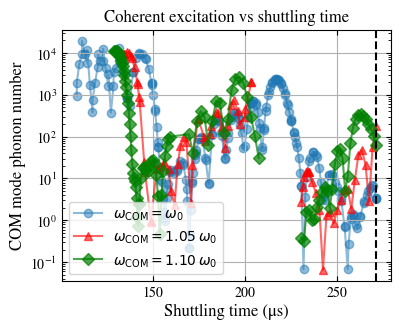

In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 12,
         "xtick.direction": "in",
         "xtick.major.pad": 3,
         "xtick.top": True,
         "ytick.labelsize": 12,
         "ytick.direction": "in",
         "ytick.right": True,
         "axes.labelsize": 12,
         "axes.labelpad": 3,
         "axes.grid": True
    }
)

# Parameters for the simulation
T_factor = (121 / 133.93969396934) * 1.65  # The time factor for the simulation
NUM_VOLTAGE_POINTS = 500  # The points for voltage sampling
T = 150 * 1e-6 * T_factor  # Total time duration in s unit
points = 3000000  # Number of points at which to evaluate the solution

shuttling_time = np.array([2.0, 1.9, 1.8, 1.7, 1.69, 1.68, 1.675, 1.67, 1.66, 1.6, 1.55, 1.5, 1.45, 1.4, 1.35, 1.3, 1.275, 1.2725, 1.2625, 1.25625, 1.25, 1.24375, 1.2375, 1.225, 1.2, 1.175, 1.1725, 1.1625, 1.15, 1.125, 1.1, 1.075, 1.05, 1.025, 1.0]) * 150 * (121 / 133.93969396934)
phonon_number = [3.3162240810623347, 1.1686538823938188, 5.875925464087038, 6.619702650001575, 31.254016433807955, 71.98736367688507, 98.34855030356773, 130.87303629718585, 232.85274899348917, 2391.1302739952052, 147.44020081614985, 629.0087480609346, 268.18965217639294, 48.43543825010925, 206.2857621064642, 95.51753401638237, 36.50945323006546, 28.964561608089042, 7.96054386244553, 1.804352613489891, 0.22117266268485491, 2.8548644300358745, 9.033128088667297, 23.698891504359, 14.689732736191997, 15.435105237356863, 14.186253152704335, 5.481084714468514, 1.6131675500567202, 74.60439276513097, 1871.5136089051891, 7469.869215480245, 9689.46367839787, 3444.424286773976, 822.7717571937637]

phonon_number_m1 = [10917.831148500894,
                    11204.503136766143,
                    11221.463603616474,
                    10976.710727993826,
                    10497.448718693766,
                    9807.351445832617,
                    8952.06622021338,
                    7974.972236816406,
                    6925.580488995814,
                    5850.266637011716,
                    4798.422598099715,
                    3809.8871368057257,
                    2919.352046646958,
                    2149.1673189952176,
                    1513.7667508605855,
                    1012.5287491080555,
                    638.4661190901367,
                    376.151101137252,
                    204.90507923133984,
                    102.44126052633757,
                    47.743716397042185,
                    22.646531404729735,
                    13.255639171075677,
                    10.228019391596268,
                    8.48703605235511,
                    6.144718720750942,
                    3.3450319915578635,
                    1.2033559675156116,
                    0.7353332177622804,
                    2.394402975256187]
shuttling_time_m1 = np.array([0.95      , 0.95344828, 0.95689655, 0.96034483, 0.9637931 ,
                            0.96724138, 0.97068966, 0.97413793, 0.97758621, 0.98103448,
                            0.98448276, 0.98793103, 0.99137931, 0.99482759, 0.99827586,
                            1.00172414, 1.00517241, 1.00862069, 1.01206897, 1.01551724,
                            1.01896552, 1.02241379, 1.02586207, 1.02931034, 1.03275862,
                            1.0362069 , 1.03965517, 1.04310345, 1.04655172, 1.05      ]) * 150 * (121 / 133.93969396934)

phonon_number_m2 = [0.3823764422417888,
                    0.32502324693579593,
                    1.5604419259381792,
                    1.792498084359018,
                    1.0318683761106808,
                    1.062220981374216,
                    2.0513344908511355,
                    3.1387355842567772,
                    4.653112466975929,
                    6.184761799729591,
                    5.07039360145654,
                    1.9932146360298484,
                    5.471828005631268,
                    22.71604802042077,
                    44.84689894517717,
                    50.27710133536522,
                    30.064086981391384,
                    4.993464381091826,
                    11.364863358670137,
                    68.71847503201228,
                    163.59522658303385,
                    261.3414385227494,
                    328.3085727409664,
                    346.77267259278347,
                    319.2808926109196,
                    264.0782736347852,
                    203.4337857971246,
                    150.28598330503823,
                    104.51495652989107,
                    62.36201898299608]
shuttling_time_m2 = np.array([1.7       , 1.71034483, 1.72068966, 1.73103448, 1.74137931,
                            1.75172414, 1.76206897, 1.77241379, 1.78275862, 1.79310345,
                            1.80344828, 1.8137931 , 1.82413793, 1.83448276, 1.84482759,
                            1.85517241, 1.86551724, 1.87586207, 1.8862069 , 1.89655172,
                            1.90689655, 1.91724138, 1.92758621, 1.93793103, 1.94827586,
                            1.95862069, 1.96896552, 1.97931034, 1.98965517, 2.        ]) * 150 * (121 / 133.93969396934)

phonon_number_m3 = [2.394402975256187,
                    10.341679736630129,
                    17.746883266992494,
                    18.879801967995178,
                    15.84125682167082,
                    15.085175921693596,
                    19.641559461240366,
                    25.98851885910303,
                    27.73577448866504,
                    22.197012471177697,
                    12.312911991024604,
                    3.7304676142863125,
                    0.46682114117097395,
                    3.93242312592925,
                    14.832571322170065,
                    34.3920546457663,
                    61.34957692396912,
                    88.05185399543221,
                    100.43843946007372]
shuttling_time_m3 = np.array([1.05      , 1.05689655, 1.0637931 , 1.07068966, 1.07758621,
                            1.08448276, 1.09137931, 1.09827586, 1.10517241, 1.11206897,
                            1.11896552, 1.12586207, 1.13275862, 1.13965517, 1.14655172,
                            1.15344828, 1.16034483, 1.16724138, 1.17413793]) * 150 * (121 / 133.93969396934)

phonon_number_m4 = [113.95230098887484,
                    39.61614232918734,
                    235.84787876381606,
                    404.5630021950763,
                    291.14823079863373,
                    63.342721596904354,
                    235.35569493472556,
                    704.8600024415663,
                    639.3219657559627,
                    122.5695425036581,
                    261.8359054904077,
                    1332.582851769415,
                    2430.9288206784604,
                    2661.6464524165476,
                    1921.5530191455898,
                    905.0772717623831,
                    300.0969284581349,
                    104.25273864724238,
                    31.09823070724036]
shuttling_time_m4 = np.array([1.25      , 1.26551724, 1.28103448, 1.29655172, 1.31206897,
                            1.32758621, 1.34310345, 1.35862069, 1.37413793, 1.38965517,
                            1.40517241, 1.42068966, 1.4362069 , 1.45172414, 1.46724138,
                            1.48275862, 1.49827586, 1.5137931 , 1.52931034])  * 150 * (121 / 133.93969396934)

shuttling_time_1 = np.array([1.7       , 1.71578947, 1.73157895, 1.74736842, 1.76315789,
                            1.77894737, 1.79473684, 1.81052632, 1.82631579, 1.84210526,
                            1.85789474, 1.87368421, 1.88947368, 1.90526316, 1.92105263,
                            1.93684211, 1.95263158, 1.96842105, 1.98421053, 2.        ]) * 150 * (121 / 133.93969396934)

phonon_number_1 = [6.622719944242334,
                    3.6665789980066514,
                    26.40020560905384,
                    43.26610387296418,
                    32.437882964454495,
                    8.074850695091568,
                    2.982109653755348,
                    11.948611462139123,
                    11.74439618130612,
                    6.192068357055268,
                    3.3273987358235915,
                    0.6739697827116691,
                    0.27495010337452586,
                    1.3850825169641057,
                    0.7593143279522443,
                    1.2361688787016312,
                    2.896015765885327,
                    4.935262779795991,
                    6.860069819101938,
                    3.3229333316504306]

shuttling_time_2 = np.array([1.5       , 1.50842105, 1.51684211, 1.52526316, 1.53368421,
                            1.54210526, 1.55052632, 1.55894737, 1.56736842, 1.57578947,
                            1.58421053, 1.59263158, 1.60105263, 1.60947368, 1.61789474,
                            1.62631579, 1.63473684, 1.64315789, 1.65157895, 1.66      ]) * 150 * (121 / 133.93969396934)

phonon_number_2 = [628.9188948472441,
                    715.8617235495441,
                    625.2224899922396,
                    398.8135916458048,
                    159.31460165015557,
                    49.08760383112478,
                    161.56191075045933,
                    504.30044461484954,
                    1005.1049082936939,
                    1549.1785151046683,
                    2017.1059972761366,
                    2313.9777111072726,
                    2387.4370778102857,
                    2231.2774143359843,
                    1892.4078850788678,
                    1454.499200018254,
                    1014.2565407174377,
                    648.0857324625774,
                    390.34507137128696,
                    232.89951946244153]

shuttling_time_3 = np.linspace(1.1, 1.16, 10) * 150 * (121 / 133.93969396934)
phonon_number_3 = [1871.4529251861752, 992.4690490748741, 451.1546616884751, 171.78240593044322, 55.796053192859674, 18.76592586005597, 8.314730748151963, 3.2465493956254425, 0.9834339791532549, 3.4605420534457125]
[1871.4529251861752, 992.4690490748741, 451.1546616884751, 171.78240593044322, 55.796053192859674, 18.76592586005597, 8.314730748151963, 3.2465493956254425, 0.9834339791532549, 3.4605420534457125]

shuttling_time_4 = np.linspace(1.0, 2.0, 80) * 150 * (121 / 133.93969396934)
phonon_number_4 = [822.8831820325785, 553.1855352141761, 3542.171964861885, 7418.750265052354, 9748.075347736132, 9550.291315380848, 7250.075046199817, 4158.847362108642, 1676.5578137796924, 417.3286389873755, 56.62349334331037, 9.04329312526159, 1.1110347310223108, 7.380877247751045, 15.97618959458514, 13.190498898531047, 16.456690491244057, 26.031210712333166, 20.983015437829177, 5.69234210323791, 0.4792879869919452, 13.311145676331547, 48.19142786474047, 90.1869494360309, 87.08293990635754, 27.439289193761844, 7.943963101493556, 110.59330008038978, 245.44588671044565, 249.18604885410141, 121.19406518440272, 30.174987850247856, 90.65755646185869, 248.02176020203984, 366.8975992970766, 345.02453786359933, 187.05368708804002, 53.45598584149631, 153.89604931299039, 477.0539761262665, 710.1349472245089, 576.5589089972765, 210.53031634995466, 55.093199254533324, 405.46048180363704, 1151.5731883360443, 1922.1306278358686, 2357.619586558614, 2284.2525232653193, 1775.4381028688915, 1105.4180049957135, 562.8893512682979, 259.0906372646809, 124.47093631889408, 55.891271781258354, 13.86489918227468, 0.0674895740823596, 10.593581390571051, 30.409641898581075, 43.07678390368917, 37.392256734106184, 17.760404734702387, 3.106450318201271, 4.344128275799964, 11.791978557101324, 12.772113827422457, 8.299232790727718, 4.895337790600413, 2.853086195149589, 0.7113415941668045, 0.06745745452049429, 1.0813954662514385, 1.2722384550374848, 0.6668664137922837, 1.2210296544611676, 2.5616014949176296, 3.95699332661789, 6.022500602985368, 6.629504719797712, 3.3229333316504306]

shuttling_time_5 = np.array([1.25      , 1.26315789, 1.27631579, 1.28947368, 1.30263158,
                    1.31578947, 1.32894737, 1.34210526, 1.35526316, 1.36842105,
                    1.38157895, 1.39473684, 1.40789474, 1.42105263, 1.43421053,
                    1.44736842, 1.46052632, 1.47368421, 1.48684211, 1.5       ]) * 150 * (121 / 133.93969396934)
phonon_number_5 = [0.21557833883358168,
                    8.889765338956778,
                    40.75899549486657,
                    85.97241022810252,
                    90.36925017194477,
                    30.741205457865956,
                    7.4235807726708,
                    114.52988917197142,
                    251.0120685367646,
                    239.6263609060765,
                    101.36244663037469,
                    29.40305106016917,
                    121.99408817955025,
                    288.4724147117752,
                    377.5509234345375,
                    301.3072286120741,
                    120.33170525893043,
                    59.96463300694118,
                    289.01736659950575,
                    628.9188948472441]

shuttling_time_0 = np.array([1.7       , 1.71578947, 1.73157895, 1.74736842, 1.76315789,
                            1.77894737, 1.79473684, 1.81052632, 1.82631579, 1.84210526,
                            1.85789474, 1.87368421, 1.88947368, 1.90526316, 1.92105263,
                            1.93684211, 1.95263158, 1.96842105, 1.98421053, 2.        ]) * 150 * (121 / 133.93969396934)
phonon_number_0 = [6.611800019088033,
                    3.6582972482942595,
                    26.369318017544657,
                    43.184343173550495,
                    32.4023308321295,
                    8.073363888764545,
                    2.9772072524057354,
                    11.940665437935861,
                    11.725732978507285,
                    6.1844655645330295,
                    3.3125373916212957,
                    0.6704987522671576,
                    0.2719823324680728,
                    1.38020543375336,
                    0.7582715754115237,
                    1.2323576315610096,
                    2.8905536554362423,
                    4.920834741776568,
                    6.82717941312589,
                    3.3061360201165386]

phonon_number_6 = [960.412857263177,
                    5565.232793973766,
                    9689.214239600225,
                    9624.276920402259,
                    5825.74543517543,
                    1763.4641674800007,
                    379.6590828241329,
                    1960.0707266309487,
                    4732.660373963657,
                    6621.267216334895,
                    6431.442126373816,
                    4289.753644587272,
                    1612.4612789634377,
                    376.0004976343955,
                    1649.6030567060948,
                    4488.424703040916,
                    6522.137598909649,
                    6008.294403782537,
                    3384.3072592824346,
                    822.8831820325785]
shuttling_time_6 = np.array([0.8       , 0.81052632, 0.82105263, 0.83157895, 0.84210526,
                            0.85263158, 0.86315789, 0.87368421, 0.88421053, 0.89473684,
                            0.90526316, 0.91578947, 0.92631579, 0.93684211, 0.94736842,
                            0.95789474, 0.96842105, 0.97894737, 0.98947368, 1.        ]) * 150 * (121 / 133.93969396934)

phonon_number_7 = [925.5835720576033,
                540.9867789523305,
                379.5372771205698,
                459.00594628758756,
                776.7624213452759,
                1311.9872709975712,
                2025.5274353012371]
shuttling_time_7 = np.array([0.93, 0.93315789, 0.93631579, 0.93947368, 0.94263158, 0.94578947, 0.94894737]) * 150 * (121 / 133.93969396934)

phonon_number_8 = [540.7838157182764,
                    484.81804175249084,
                    440.35394049977776,
                    407.19763007056184,
                    385.5767372568061,
                    376.54684034588297,
                    379.40067427425936,
                    393.4928146330621,
                    420.26803538991174,
                    459.04890258792]
shuttling_time_8 = np.array([0.93315789, 0.93385964, 0.9345614 , 0.93526315, 0.93596491, 0.93666666, 0.93736842, 0.93807017, 0.93877193, 0.93947368]) * 150 * (121 / 133.93969396934)

phonon_number_9 = [1652.4772295961702,
                    1416.916987380497,
                    1201.199446708044,
                    1006.5449084799493,
                    835.9621789276681,
                    690.6854743866578,
                    572.1272837340895,
                    481.70899237514504,
                    420.50727639426356,
                    389.4163396944165,
                    388.6817234402452,
                    418.93463545608853,
                    479.6264969829406,
                    570.3723559646336,
                    690.9544373690151,
                    839.8290183040909,
                    1016.232803286527,
                    1217.3605466777492,
                    1443.1019558783248,
                    1690.3865706072002]
shuttling_time_9 = np.array([0.92631579, 0.92742382, 0.92853186, 0.92963989, 0.93074792,
                            0.93185596, 0.93296399, 0.93407202, 0.93518006, 0.93628809,
                            0.93739612, 0.93850415, 0.93961219, 0.94072022, 0.94182825,
                            0.94293629, 0.94404432, 0.94515235, 0.94626039, 0.94736842]) * 150 * (121 / 133.93969396934)

phonon_number_10 = [1920.456286688493,
                    19406.050090061202,
                    11549.868445267326,
                    769.5182118228291,
                    9581.306724941125,
                    12788.971323715221,
                    3075.80833112831,
                    3486.6881439897925,
                    13118.459178404775,
                    6465.730063659422]
shuttling_time_10 = np.array([0.8       , 0.82111111, 0.84222222, 0.86333333, 0.88444444,
                            0.90555556, 0.92666667, 0.94777778, 0.96888889, 0.99      ]) * 150 * (121 / 133.93969396934)

phonon_number_11 = [9568.328141283175,
                    8563.478251157201,
                    1786.557164266618,
                    24.143707752822532,
                    0.9226381644066272,
                    17.15466195231177,
                    25.125977877617014,
                    4.99492143709375,
                    22.376485596003374,
                    95.46146530501147,
                    2.5974705857599454,
                    257.4997523929176,
                    80.11713138534785,
                    180.32989742056165,
                    372.23198390284574,
                    52.30088213756731,
                    585.1094444973797,
                    401.2456461285471,
                    295.58568261081183,
                    2081.683960353963]
shuttling_time_11 = np.array([0.99      , 1.01684211, 1.04368421, 1.07052632, 1.09736842,
                            1.12421053, 1.15105263, 1.17789474, 1.20473684, 1.23157895,
                            1.25842105, 1.28526316, 1.31210526, 1.33894737, 1.36578947,
                            1.39263158, 1.41947368, 1.44631579, 1.47315789, 1.5       ]) * 150 * (121 / 133.93969396934)

phonon_number_12 = [2.726979296482458,
                    6.20912002423036,
                    10.86111341545978,
                    14.362937801097196,
                    15.40970522868022,
                    14.086232480250871]
shuttling_time_12 = np.array([1.7       , 1.70612245, 1.7122449 , 1.71836735, 1.7244898 , 1.73061224]) * 150 * (121 / 133.93969396934)

phonon_number_13 = [9567.73064611388,
                    10735.330424443164,
                    9832.64787629046,
                    7423.384802129073,
                    4507.598029273467,
                    2082.1323897876505,
                    659.918578995693]
shuttling_time_13 = np.array([0.99      , 1.00040816, 1.01081633, 1.02122449, 1.03163265, 1.04204082, 1.05244898]) * 150 * (121 / 133.93969396934)

phonon_number_14 = [901.7163254961342,
                    14.277885527396183,
                    0.9363572309346078,
                    18.154305170914057,
                    19.969890977981976,
                    16.9619135738993,
                    2.286897905772318,
                    59.259627176040254,
                    74.33825567929853,
                    20.504558432119925,
                    266.7064531471633,
                    97.0870707143194,
                    115.55097127559138,
                    385.08659426655197,
                    169.21136800818573,
                    181.01348086765677,
                    738.1633370739263,
                    197.28639927428566,
                    453.17792272569903,
                    2081.6519058654426]
shuttling_time_14 = np.array([1.05      , 1.07368421, 1.09736842, 1.12105263, 1.14473684,
                            1.16842105, 1.19210526, 1.21578947, 1.23947368, 1.26315789,
                            1.28684211, 1.31052632, 1.33421053, 1.35789474, 1.38157895,
                            1.40526316, 1.42894737, 1.45263158, 1.47631579, 1.5       ]) * 150 * (121 / 133.93969396934)

phonon_number_15 = [14.303644720707341,
                8.123262964216096,
                4.550113912206718,
                1.7715779668291562,
                0.06542574863248608,
                1.3336742424373118,
                1.609921396344434,
                0.8405368670945713,
                1.7265657280517224,
                3.1097152303331055,
                5.163504234090552,
                5.49155396841289,
                1.855050510487784,
                9.442146094503748,
                36.26556079705349,
                48.25401199884358,
                21.046207410563675,
                2.8340693671259762,
                58.14776920559573,
                176.9946765499624]
shuttling_time_15 = np.array([1.73      , 1.74421053, 1.75842105, 1.77263158, 1.78684211,
                        1.80105263, 1.81526316, 1.82947368, 1.84368421, 1.85789474,
                        1.87210526, 1.88631579, 1.90052632, 1.91473684, 1.92894737,
                        1.94315789, 1.95736842, 1.97157895, 1.98578947, 2.        ]) * 150 * (121 / 133.93969396934)

merged_shuttling_time = np.concatenate((shuttling_time, shuttling_time_1, shuttling_time_2, shuttling_time_3, shuttling_time_4, shuttling_time_5, shuttling_time_6, shuttling_time_10))
merged_phonon_number = np.concatenate((phonon_number, phonon_number_1, phonon_number_2, phonon_number_3, phonon_number_4, phonon_number_5, phonon_number_6, phonon_number_10))

# combined = list(zip(merged_shuttling_time, merged_phonon_number))
# sorted_combined = sorted(combined, key=lambda x: x[0])
# merged_shuttling_time, merged_phonon_number = zip(*sorted_combined)

merged_shuttling_time = merged_shuttling_time.tolist()
merged_phonon_number = merged_phonon_number.tolist()

sorted_pairs = sorted(zip(merged_shuttling_time, merged_phonon_number))
merged_shuttling_time_sorted, merged_phonon_number_sorted = zip(*sorted_pairs)

# Plotting settings
half_column_width_inches = 4.25
aspect_ratio = 1.3  # Desired aspect ratio
plt.figure(figsize=(half_column_width_inches, half_column_width_inches / aspect_ratio))

plt.plot(merged_shuttling_time_sorted, merged_phonon_number_sorted, marker='o', linestyle='-', color='C0', zorder=0, alpha=0.5, label='$\omega_{\mathrm{COM}} = \omega_{\mathrm{0}}$')
# plt.scatter(merged_shuttling_time_sorted, merged_phonon_number_sorted, marker='o', linestyle='-', color = "C0", zorder=2, alpha=0.5, label='$\omega_{\mathrm{COM}} = \omega_{\mathrm{0}}$')
# plt.scatter(shuttling_time_0, phonon_number_0, c="black", s=10, zorder=1)

# plt.scatter(shuttling_time_8, phonon_number_8, c="black", s=5, zorder=1)
# plt.scatter(shuttling_time_9, phonon_number_9, c="black", s=5, zorder=1)
# plt.scatter(shuttling_time_10, phonon_number_10, c="red", s=5, zorder=2)
merged_shuttling_time_5 = np.concatenate((shuttling_time_11, shuttling_time_12, shuttling_time_13, shuttling_time_14, shuttling_time_15))
merged_phonon_number_5 = np.concatenate((phonon_number_11, phonon_number_12, phonon_number_13, phonon_number_14, phonon_number_15))
merged_shuttling_time_5 = merged_shuttling_time_5.tolist()
merged_phonon_number_5 = merged_phonon_number_5.tolist()
sorted_pairs_5 = sorted(zip(merged_shuttling_time_5, merged_phonon_number_5))
merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5 = zip(*sorted_pairs_5)
merged_shuttling_time_sorted_5_1 = [time for time in merged_shuttling_time_sorted_5 if time < 215]
merged_phonon_number_sorted_5_1 = [phonon for time, phonon in zip(merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5) if time < 215]
merged_shuttling_time_sorted_5_2 = [time for time in merged_shuttling_time_sorted_5 if time > 215]
merged_phonon_number_sorted_5_2 = [phonon for time, phonon in zip(merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5) if time > 215]
# plt.plot(merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5, marker='^', linestyle='-', c="red", zorder=2, alpha=0.6, label='$\omega_{\mathrm{COM}} = 1.05 \, \omega_{\mathrm{0}}$')
plt.plot(merged_shuttling_time_sorted_5_1, merged_phonon_number_sorted_5_1, marker='^', linestyle='-', c="red", zorder=2, alpha=0.6, label='$\omega_{\mathrm{COM}} = 1.05 \, \omega_{\mathrm{0}}$')
plt.plot(merged_shuttling_time_sorted_5_2, merged_phonon_number_sorted_5_2, marker='^', linestyle='-', c="red", zorder=2, alpha=0.6)
# plt.scatter(merged_shuttling_time_sorted_5, merged_phonon_number_sorted_5, marker='^', color = "red", zorder=2, alpha=0.5, label='$\omega_{\mathrm{COM}} = 1.05 \, \omega_{\mathrm{0}}$')
# plt.plot(shuttling_time_1, phonon_number_1, marker='o', linestyle='-', color='C0')

merged_shuttling_time_10 = np.concatenate((shuttling_time_m1, shuttling_time_m2, shuttling_time_m3, shuttling_time_m4))
merged_phonon_number_10 = np.concatenate((phonon_number_m1, phonon_number_m2, phonon_number_m3, phonon_number_m4))
merged_shuttling_time_10 = merged_shuttling_time_10.tolist()
merged_phonon_number_10 = merged_phonon_number_10.tolist()
sorted_pairs_10 = sorted(zip(merged_shuttling_time_10, merged_phonon_number_10))
merged_shuttling_time_sorted_10, merged_phonon_number_sorted_10 = zip(*sorted_pairs_10)
merged_shuttling_time_sorted_10_1 = [time for time in merged_shuttling_time_sorted_10 if time < 215]
merged_phonon_number_sorted_10_1 = [phonon for time, phonon in zip(merged_shuttling_time_sorted_10, merged_phonon_number_sorted_10) if time < 215]
merged_shuttling_time_sorted_10_2 = [time for time in merged_shuttling_time_sorted_10 if time > 215]
merged_phonon_number_sorted_10_2 = [phonon for time, phonon in zip(merged_shuttling_time_sorted_10, merged_phonon_number_sorted_10) if time > 215]
# plt.plot(merged_shuttling_time_sorted_10, merged_phonon_number_sorted_10, marker="D", linestyle='-', c="green", zorder=2, alpha=0.7, label='$\omega_{\mathrm{COM}} = 1.10 \, \omega_{\mathrm{0}}$')
plt.plot(merged_shuttling_time_sorted_10_1, merged_phonon_number_sorted_10_1, marker="D", linestyle='-', c="green", zorder=2, alpha=0.7, label='$\omega_{\mathrm{COM}} = 1.10 \, \omega_{\mathrm{0}}$')
plt.plot(merged_shuttling_time_sorted_10_2, merged_phonon_number_sorted_10_2, marker="D", linestyle='-', c="green", zorder=2, alpha=0.7)
# plt.scatter(merged_shuttling_time_sorted_10, merged_phonon_number_sorted_10, marker='D', color = "green", zorder=2, alpha=0.5, label='$\omega_{\mathrm{COM}} = 1.10 \, \omega_{\mathrm{0}}$')

# time = 150 * (121 / 133.93969396934)
# start = time * 0.99
# stop = time * 1.01
# plt.axvspan(start, stop, color='red', alpha=0.3)

time = 150 * (121 / 133.93969396934) * 2
start = time * 0.995
stop = time * 1.005
# plt.axvspan(start, stop, color='red', alpha=0.3)
plt.axvline(start/2+stop/2, color='black', linestyle='--', alpha=1)

# plt.xlim(100, 150)
# plt.ylim(100, 2000)

plt.xlabel('Shuttling time (μs)', fontsize=12)
plt.ylabel('COM mode phonon number', fontsize=12)
plt.title('Coherent excitation vs shuttling time', fontsize=12)
plt.yscale('log')
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

pdf_filename = 'Phonon_number_vs_shuttling_time.pdf'

plt.legend()
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
plt.show()